In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warning
import warnings
warnings.filterwarnings("ignore")


# Normality test
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as st

#Feature Encoding 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#CrossValidate 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

#Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

#Hypertuning Parameter 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Load Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(3)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   
1   60 months     15.27        59.83     C        C4     Ryder   < 1 year   
2   36 months     15.96        84.33     C        C5       NaN  10+ years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   
1        4.0                   f        0.0            0.0  1008.710000   
2       10.0                   f        0.0            0.0  3003.653644   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                 0.0   
1          1008.71           456.46         435.17                 0.0   
2          3003.65          2400.00         603.65                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0          NaN             Jan-16                         0.0   
1          NaN             Sep-13                         0.0   
2          NaN             Jan-16                         0.0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN            1       INDIVIDUAL   
1                          NaN            1       INDIVIDUAL   
2                          NaN            1       INDIVIDUAL   

   annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
0               NaN        NaN                        NaN             0.0   
1               NaN        NaN                        NaN             0.0   
2               NaN        NaN                        NaN             0.0   

   tot_coll_a

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
var = df.dtypes.reset_index()
var.columns = ['Kolom', 'Tipe_Data']

In [6]:
fitur = df.columns.tolist()
list = []
list2 = []
for i in range(0, len(fitur)):
    x = df[fitur[i]].nunique()
    y = df[fitur[i]].unique()
    list.append(x)
    list2.append(y)
var['Nunique'] = list
var['Unique'] = list2

In [7]:
var = var.sort_values(by='Nunique', ascending=False)

In [8]:
pd.set_option('display.max_rows', None)
var

Kolom Tipe_Data  Nunique  \
0                    Unnamed: 0     int64   466285   
19                          url    object   466285   
2                     member_id     int64   466285   
1                            id     int64   466285   
39                  total_pymnt   float64   351609   
40              total_pymnt_inv   float64   347659   
42                total_rec_int   float64   270249   
59                  tot_cur_bal   float64   220690   
11                    emp_title    object   205475   
47              last_pymnt_amnt   float64   198194   
41              total_rec_prncp   float64   172713   
38                out_prncp_inv   float64   141189   
37                    out_prncp   float64   135665   
20                         desc    object   124436   
22                        title    object    63099   
33                    revol_bal     int64    58142   
8                   installment   float64    55622   
14                   annual_inc   float64    31901   
44                   recoveries   float64    22773   
45      collection_recovery_fee   float64    20275   
71             total_rev_hi_lim   float64    14612   
5               funded_amnt_inv   float64     9854   
58                 tot_coll_amt   float64     6321   
43           total_rec_late_fee   float64     5808   
25                          dti   float64     3997   
4                   funded_amnt     int64     1354   
3                     loan_amnt     int64     1352   
34                   revol_util   float64     1269   
23                     zip_code    object      888   
27             earliest_cr_line    object      664   
7                      int_rate   float64      506   
51  mths_since_last_major_derog   float64      162   
29       mths_since_last_delinq   float64      145   
30       mths_since_last_record   float64      123   
35                    total_acc   float64      112   
49           last_credit_pull_d    object      103   
48                 next_pymnt_d    object      100   
46                 last_pymnt_d    object       98   
16                      issue_d    object       91   
31                     open_acc   float64       62   
24                   addr_state    object       50   
10                    sub_grade    object       35   
28               inq_last_6mths   float64       28   
32                      pub_rec   float64       26   
26                  delinq_2yrs   float64       24   
21                      purpose    object       14   
12                   emp_length    object       11   
17                  loan_status    object        9   
50   collections_12_mths_ex_med   float64        9   
9                         grade    object        7   
57               acc_now_delinq   float64        6   
13               home_ownership    object        6   
15          verification_status    object        3   
6                          term    object        2   
36          initial_list_status    object        2   
18                   pymnt_plan    object        2   
52                  policy_code     int64        1   
53             application_type    object        1   
66                      il_util   float64        0   
73                  total_cu_tl   float64        0   
72                       inq_fi   float64        0   
70                     all_util   float64        0   
69                   max_bal_bc   float64        0   
68                  open_rv_24m   float64        0   
67                  open_rv_12m   float64        0   
63                  open_il_24m   float64        0   
65                 total_bal_il   float64        0   
64           mths_since_rcnt_il   float64        0   
62                  open_il_12m   float64        0   
61                   open_il_6m   float64        0   
60                  open_acc_6m   float64        0   
56    verification_status_joint   float64        0   
55                    dti_joint   float64        0   
54             annual_inc_join

In [9]:
print('Variabel bertipe object :', var[var['Tipe_Data']=='object'].shape)
print('Variabel bertipe numerik :', var[var['Tipe_Data']!='object'].shape)

Variabel bertipe object : (22, 4)
Variabel bertipe numerik : (53, 4)


In [10]:
var_object = var[var['Tipe_Data']=='object']
var_object

Kolom Tipe_Data  Nunique  \
19                  url    object   466285   
11            emp_title    object   205475   
20                 desc    object   124436   
22                title    object    63099   
23             zip_code    object      888   
27     earliest_cr_line    object      664   
49   last_credit_pull_d    object      103   
48         next_pymnt_d    object      100   
46         last_pymnt_d    object       98   
16              issue_d    object       91   
24           addr_state    object       50   
10            sub_grade    object       35   
21              purpose    object       14   
12           emp_length    object       11   
17          loan_status    object        9   
9                 grade    object        7   
13       home_ownership    object        6   
15  verification_status    object        3   
6                  term    object        2   
36  initial_list_status    object        2   
18           pymnt_plan    object        2   
53     application_type    object        1   

                                               Unique  
19  [https://www.lendingclub.com/browse/loanDetail...  
11  [nan, Ryder, AIR RESOURCES BOARD, University M...  
20  [  Borrower added on 12/22/11 > I need to upgr...  
22  [Computer, bike, real estate business, persone...  
23  [860xx, 309xx, 606xx, 917xx, 972xx, 852xx, 280...  
27  [Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-0...  
49  [Jan-16, Sep-13, Jan-15, Sep-15, Dec-14, Aug-1...  
48  [nan, Feb-16, Jan-16, Sep-13, Feb-14, May-14, ...  
46  [Jan-15, Apr-13, Jun-14, Jan-16, Apr-12, Nov-1...  
16  [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...  
24  [AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, F...  
10  [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...  
21  [credit_card, car, small_business, other, wedd...  
12  [10+ years, < 1 year, 1 year, 3 years, 8 years...  
17  [Fully Paid, Charged Off, Current, Default, La...  
9                               [B, C, A, E, F, D, G]  
13            [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]  
15          [Verified, Source Verified, Not Verified]  
6                            [ 36 months,  60 months]  
36                                             [f, w]  
18                                             [n, y]  
53                                       [INDIVIDUAL]

- Beberapa variabel/kolom yang memiliki cardinality tinggi akan didrop
- Beberapa variabel juga seluruhnya missing value dan tidak mengandung informasi sama sekali akan didrop

In [11]:
list_drop = ['Unnamed: 0', 'id', 'member_id','il_util', 'total_cu_tl', 'inq_fi', 'all_util','max_bal_bc', 'open_rv_24m', \
             'open_rv_12m', 'open_il_24m','total_bal_il', 'mths_since_rcnt_il', 'open_il_12m', 'open_il_6m', 'open_acc_6m',\
             'verification_status_joint','dti_joint','annual_inc_joint', 'inq_last_12m','url', 'emp_title', 'desc', 'title', 'zip_code']

In [12]:
df = df.drop(list_drop, axis=1)

In [13]:
num = df.loc[:, df.dtypes!=np.object]
cat = df.loc[:, df.dtypes==np.object]

In [14]:
num.describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  466285.000000  466285.000000    466285.000000  466285.000000   
mean    14317.277577   14291.801044     14222.329888      13.829236   
std      8286.509164    8274.371300      8297.637788       4.357587   
min       500.000000     500.000000         0.000000       5.420000   
25%      8000.000000    8000.000000      8000.000000      10.990000   
50%     12000.000000   12000.000000     12000.000000      13.660000   
75%     20000.000000   20000.000000     19950.000000      16.490000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment    annual_inc            dti    delinq_2yrs  \
count  466285.000000  4.662810e+05  466285.000000  466256.000000   
mean      432.061201  7.327738e+04      17.218758       0.284678   
std       243.485550  5.496357e+04       7.851121       0.797365   
min        15.670000  1.896000e+03       0.000000       0.000000   
25%       256.690000  4.500000e+04      11.360000       0.000000   
50%       379.890000  6.300000e+04      16.870000       0.000000   
75%       566.580000  8.896000e+04      22.780000       0.000000   
max      1409.990000  7.500000e+06      39.990000      29.000000   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count   466256.000000           215934.000000            62638.000000   
mean         0.804745               34.104430               74.306012   
std          1.091598               21.778487               30.357653   
min          0.000000                0.000000                0.000000   
25%          0.000000               16.000000               53.000000   
50%          0.000000               31.000000               76.000000   
75%          1.000000               49.000000              102.000000   
max         33.000000              188.000000              129.000000   

            open_acc        pub_rec     revol_bal     revol_util  \
count  466256.000000  466256.000000  4.662850e+05  465945.000000   
mean       11.187069       0.160564  1.623020e+04      56.176947   
std         4.987526       0.510863  2.067625e+04      23.732628   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%         8.000000       0.000000  6.413000e+03      39.200000   
50%        10.000000       0.000000  1.176400e+04      57.600000   
75%        14.000000       0.000000  2.033300e+04      74.700000   
max        84.000000      63.000000  2.568995e+06     892.300000   

           total_acc      out_prncp  out_prncp_inv    total_pymnt  \
count  466256.000000  466285.000000  466285.000000  466285.000000   
mean       25.064430    4410.062342    4408.452258   11540.686220   
std        11.600141    6355.078769    6353.198001    8265.627112   
min         1.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.000000       0.000000    5552.125349   
50%        23.000000     441.470000     441.380000    9419.250943   
75%        32.000000    7341.650000    7338.390000   15308.158460   
max       156.000000   32160.380000   32160.380000   57777.579870   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count    466285.000000    466285.000000  466285.000000       466285.000000   
mean      11469.892747      8866.014657    2588.677225            0.650129   
std        8254.157579      7031.687997    2483.809661            5.265730   
min           0.000000         0.000000       0.000000            0.000000   
25%        5499.250000      3708.560000     957.280000            0.000000   
50%        9355.430000      6817.760000    1818.880000            0.000000   
75%       15231.310000     12000.000000    3304.530000            0.000000   
max       57777.580000     35000.030000   24205.620000          358.680000   

          recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  466285.000000            466285.000000    466285.000000   
mean       85.344211          

In [15]:
cat.describe()

term   grade sub_grade emp_length home_ownership  \
count       466285  466285    466285     445277         466285   
unique           2       7        35         11              6   
top      36 months       B        B3  10+ years       MORTGAGE   
freq        337953  136929     31686     150049         235875   

       verification_status issue_d loan_status pymnt_plan             purpose  \
count               466285  466285      466285     466285              466285   
unique                   3      91           9          2                  14   
top               Verified  Oct-14     Current          n  debt_consolidation   
freq                168055   38782      224226     466276              274195   

       addr_state earliest_cr_line initial_list_status last_pymnt_d  \
count      466285           466256              466285       465909   
unique         50              664                   2           98   
top            CA           Oct-00                   f       Jan-16   
freq        71450             3674              303005       179620   

       next_pymnt_d last_credit_pull_d application_type  
count        239071             466243           466285  
unique          100                103                1  
top          Feb-16             Jan-16       INDIVIDUAL  
freq         208393             327699           466285

In [16]:
df.duplicated().sum()

0

- Tidak ada data duplikat

# Exploratory Data Analysis

## Univariate Analysis

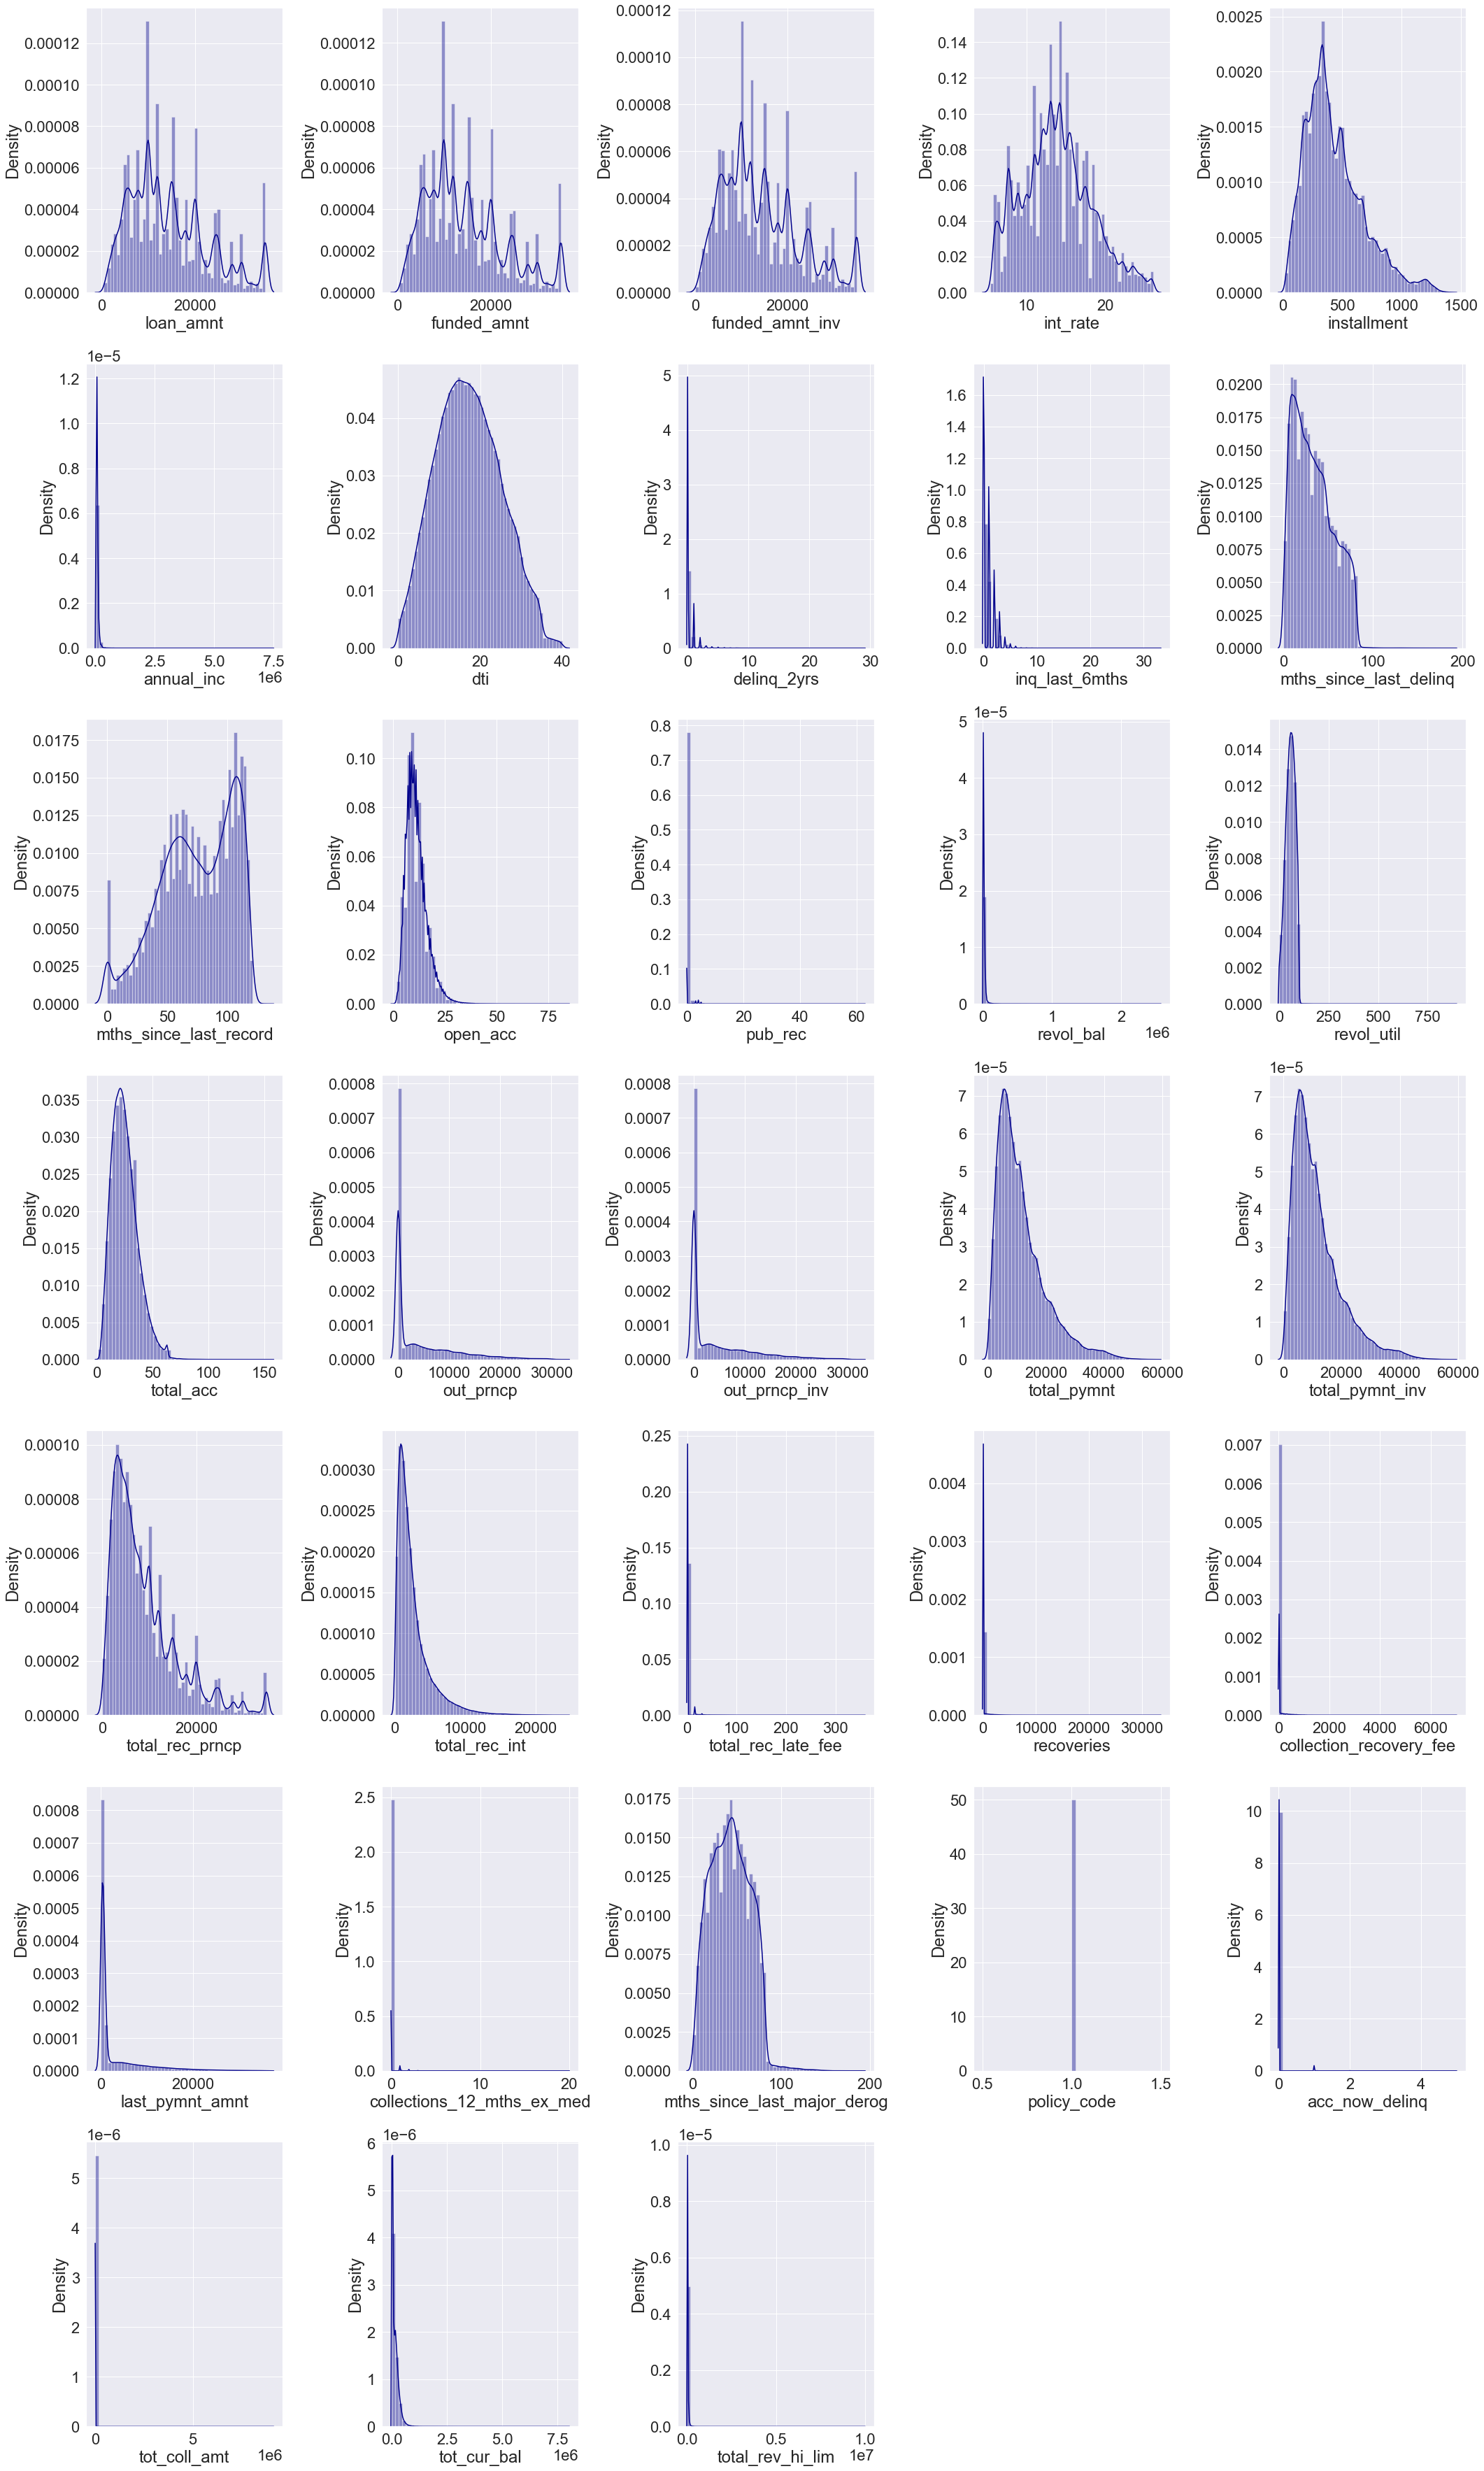

In [17]:
features = num.columns


for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (30,70)
    sns.set(font_scale=2)
    plt.subplot(10,5,i+1)
    sns.distplot(x=df[features[i]], color='Darkblue')
    plt.xlabel(features[i])
    plt.tight_layout()

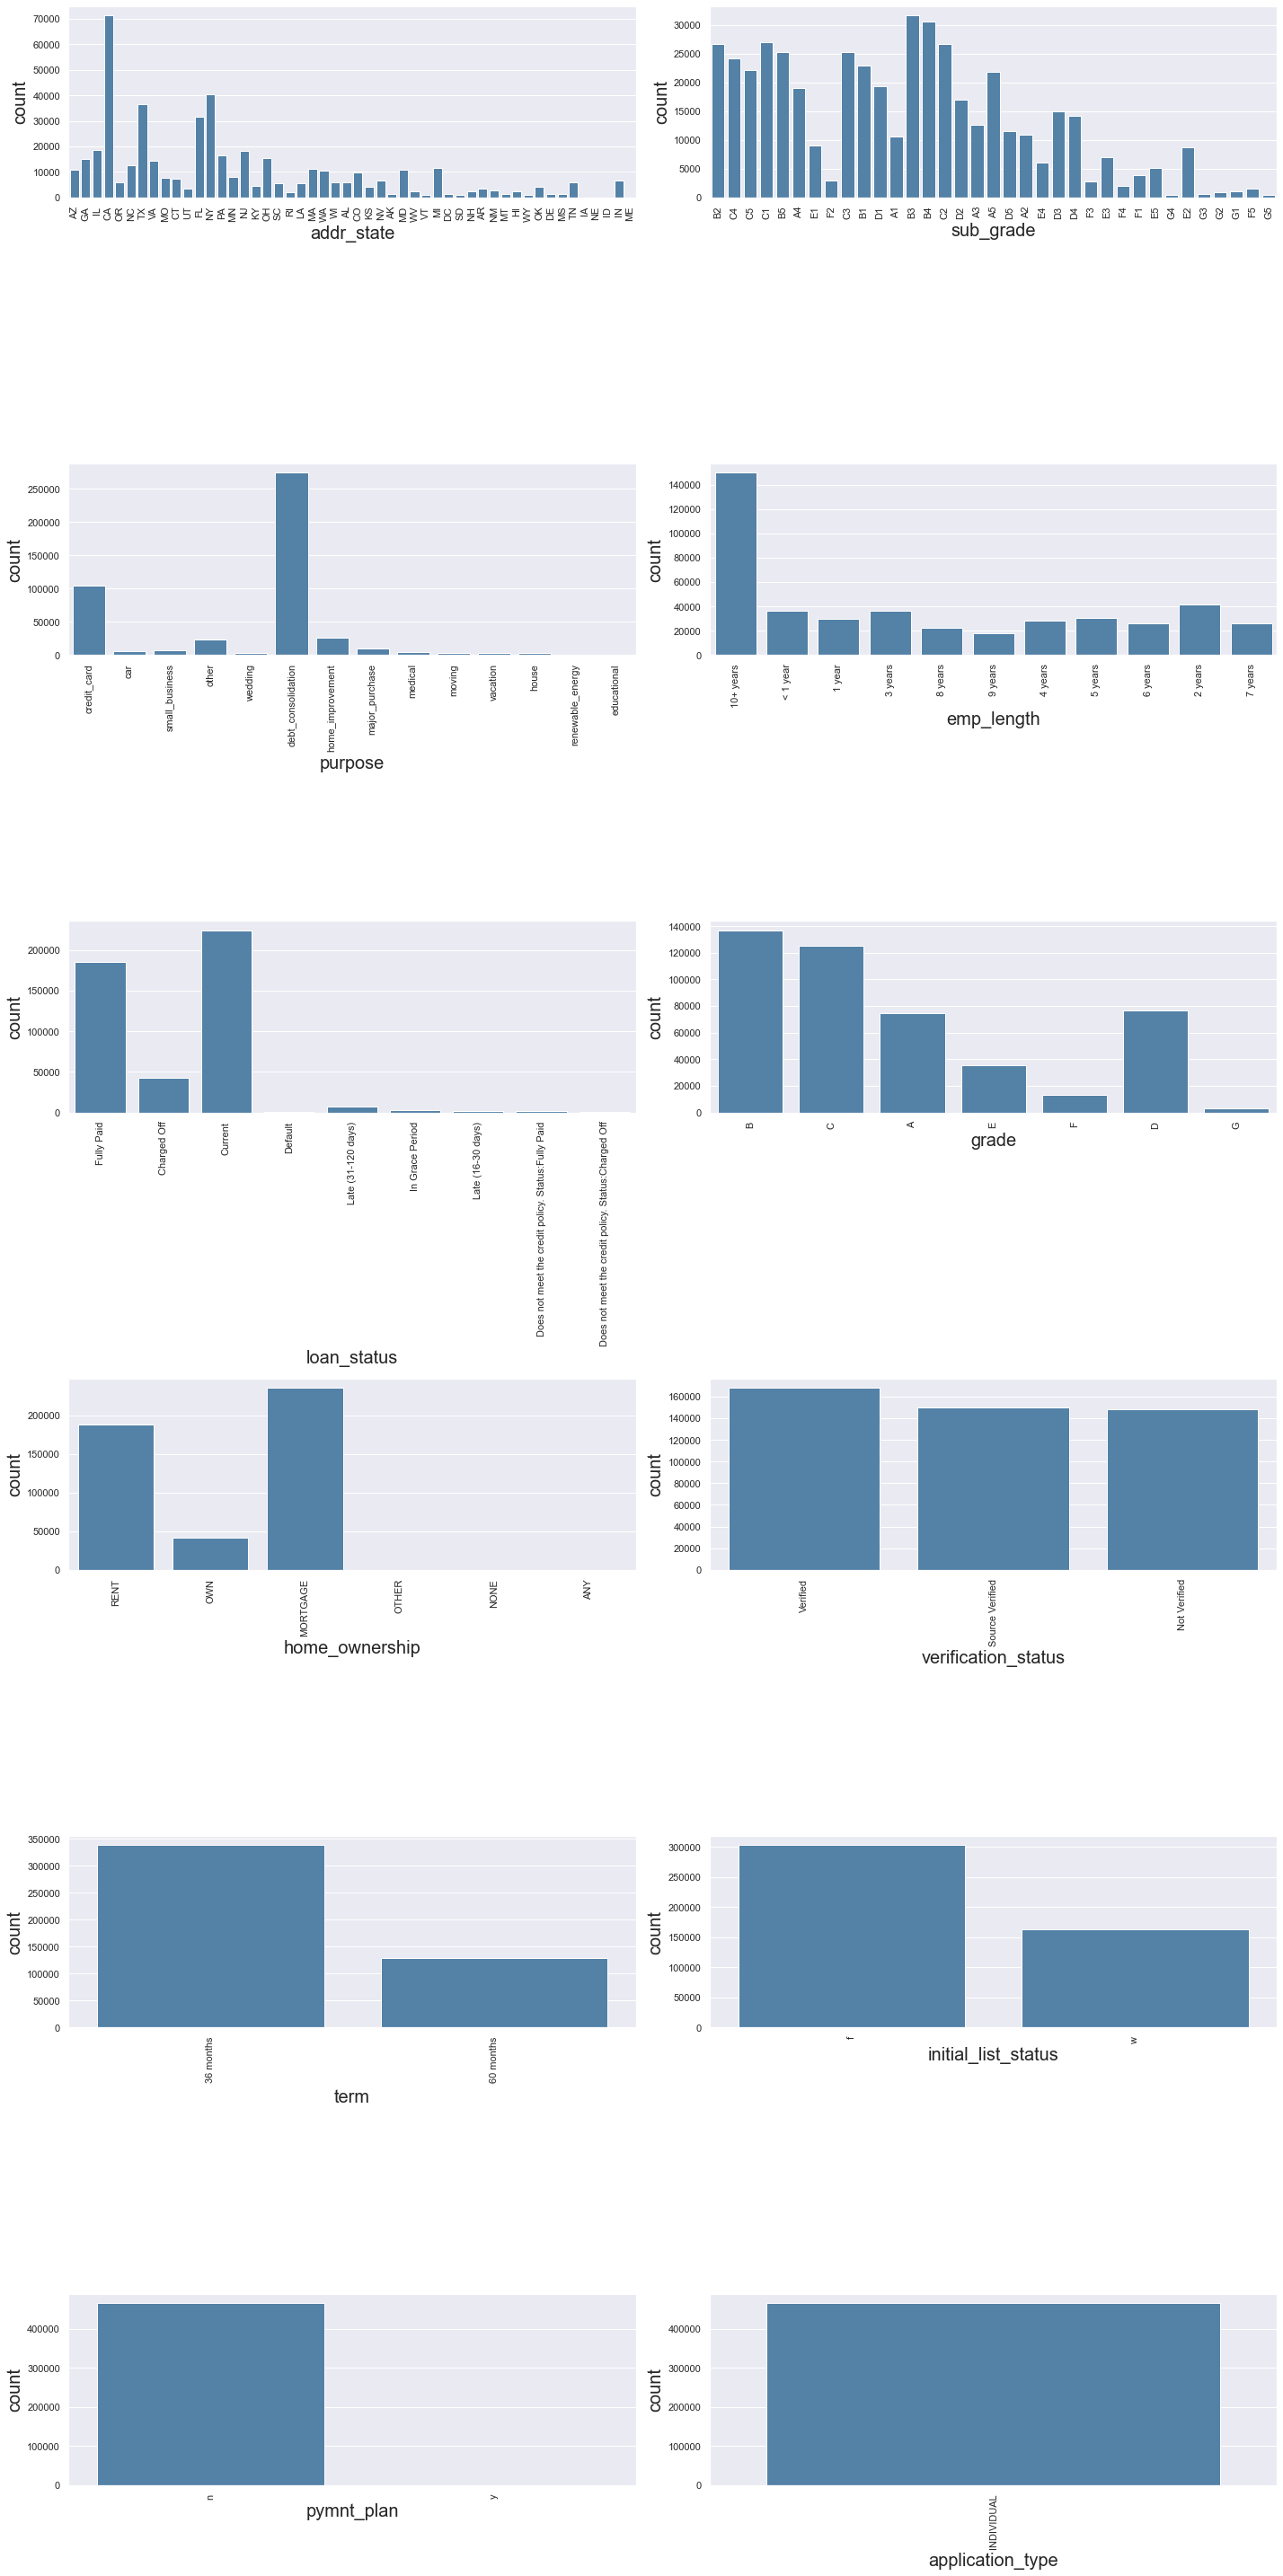

In [18]:
# features = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER']
features = ['addr_state', 'sub_grade', 'purpose','emp_length', 'loan_status', 'grade', 'home_ownership','verification_status',\
            'term', 'initial_list_status', 'pymnt_plan','application_type']

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20, 40)
    sns.set(font_scale=1)
    plt.subplot(6,2,i+1)
    sns.countplot(x=df[features[i]], color='Steelblue')
    plt.xlabel(features[i], fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.xticks(rotation = 90)
    plt.tight_layout()

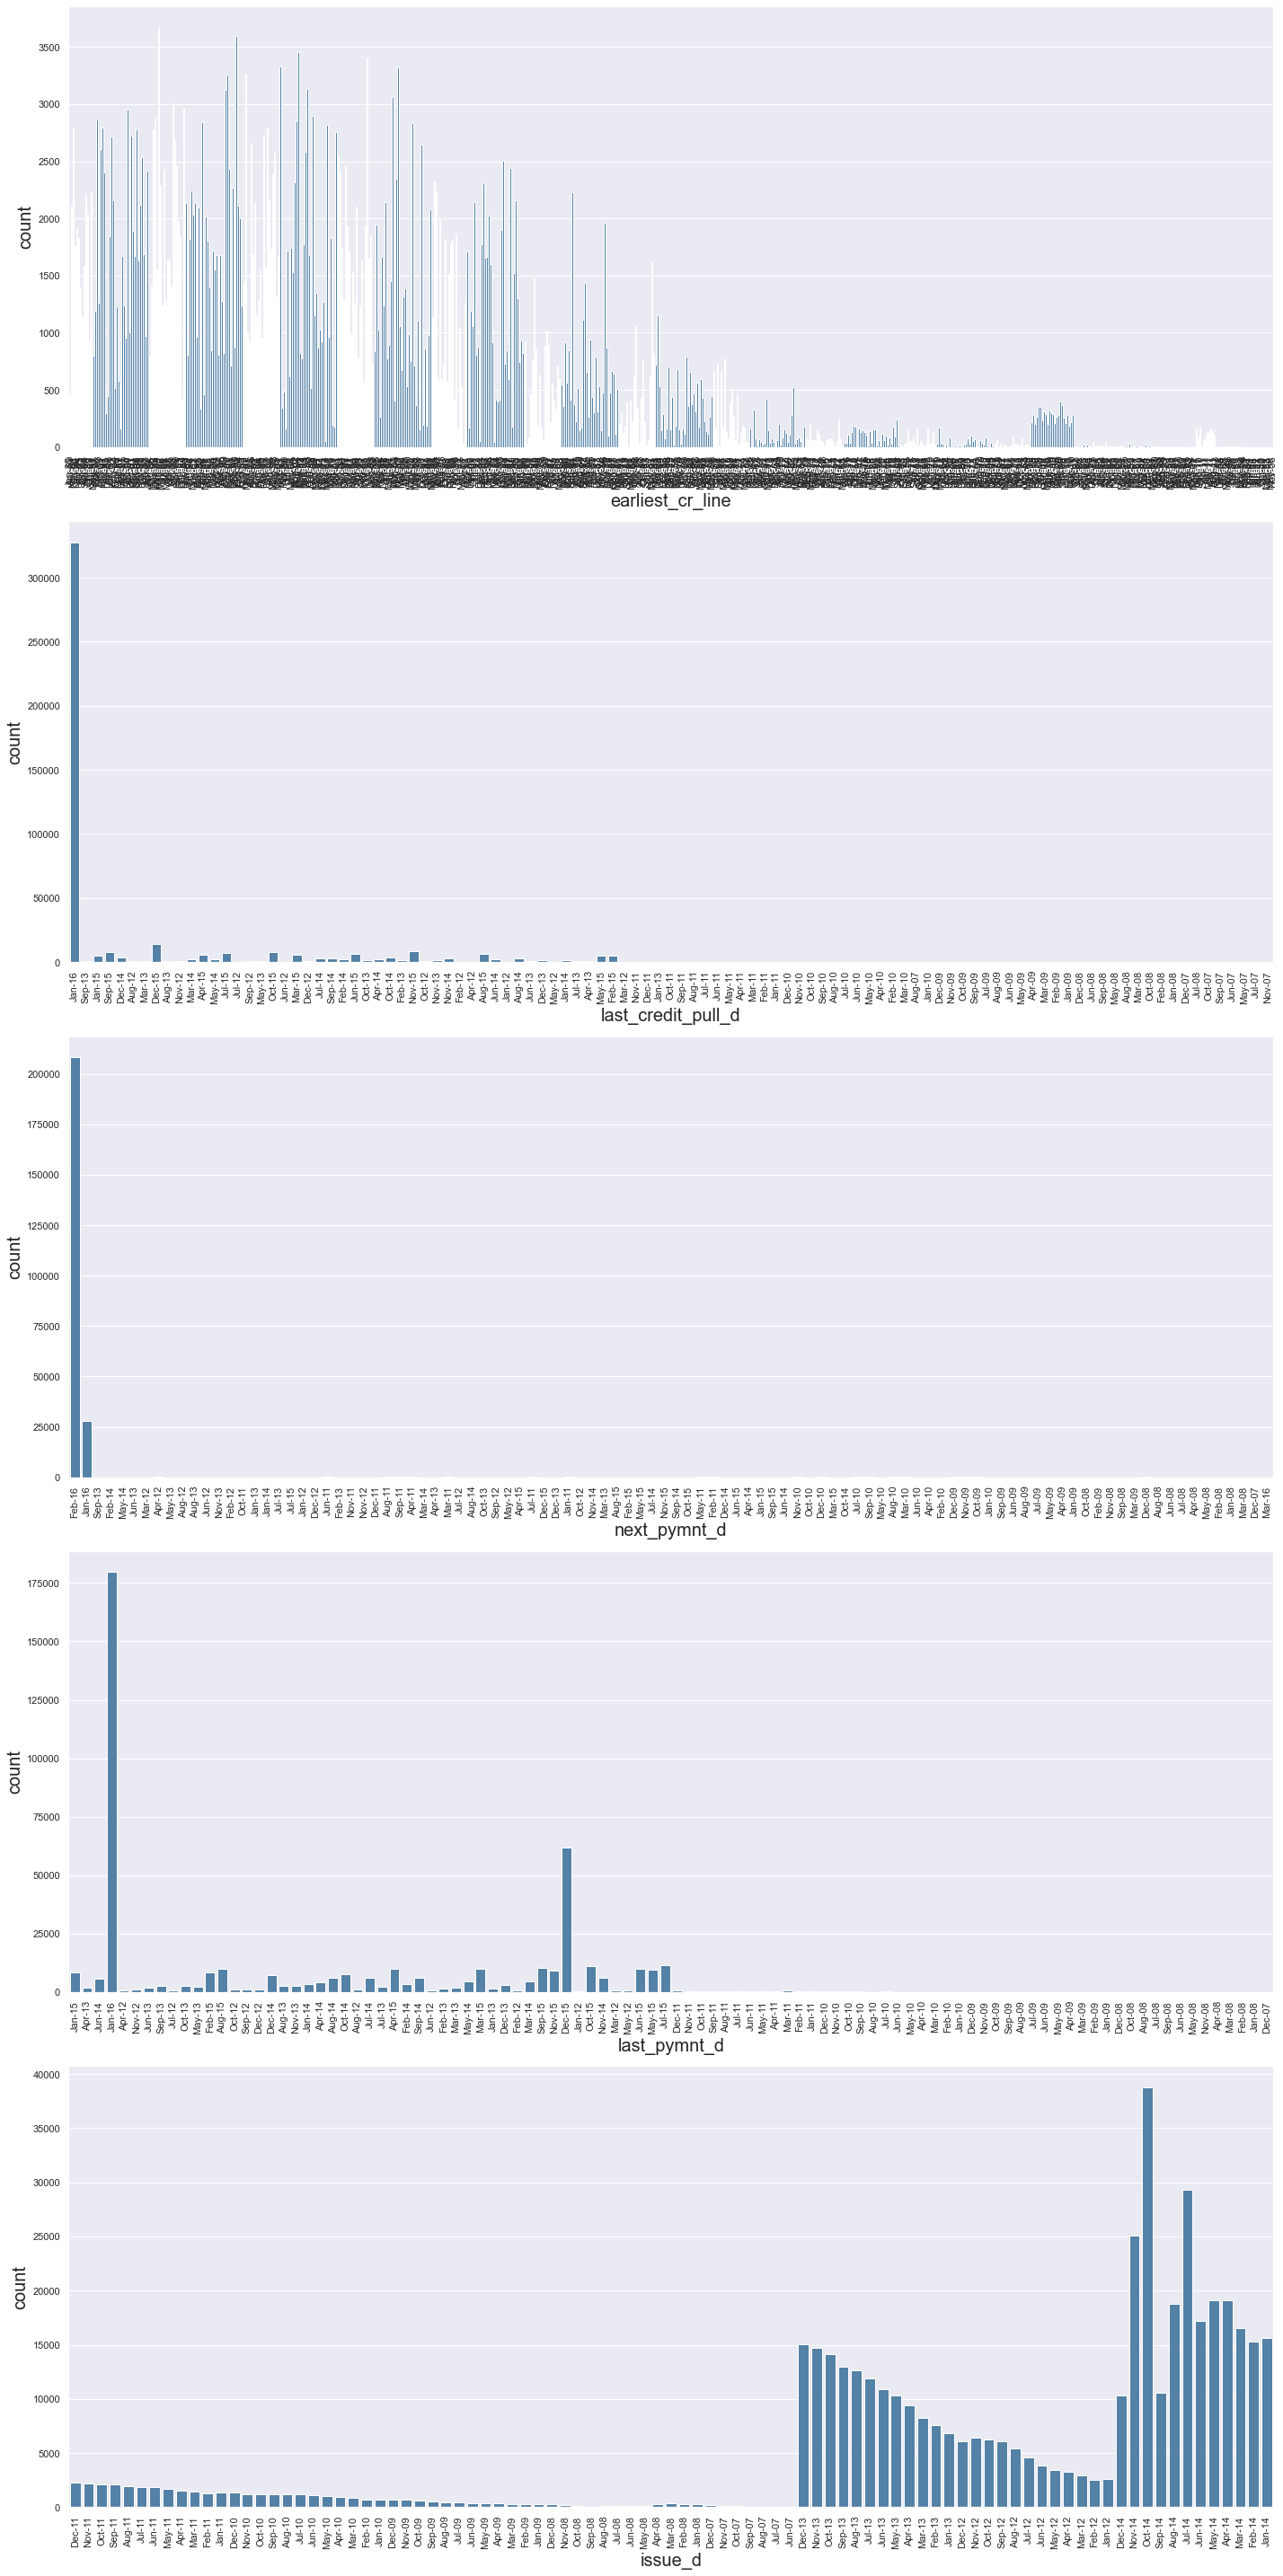

In [19]:
# features = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER']
features = ['earliest_cr_line', 'last_credit_pull_d', 'next_pymnt_d', 'last_pymnt_d', 'issue_d']

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20, 40)
    sns.set(font_scale=1)
    plt.subplot(5,1,i+1)
    sns.countplot(x=df[features[i]], color='Steelblue')
    plt.xlabel(features[i], fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.xticks(rotation = 90)
    plt.tight_layout()

# Multivariate 

- Sebelum melakukan Multivariate Analysis terlebih dahulu melakukan feature engineering pada variabel target

In [20]:
df_train = df.copy()

Untuk fitur target terlebih dahulu akan ditentukan melalui feature engineering

Pada variabel 'loan_status' terdapat informasi status pinjaman nasabah saat ini
- Current : Nasabah telah melakukan pembayaran angsuran 
- Fully Paid : Nasabah melakukan pelunasan (Asumsi bahwa pelunasan dilakukan karena nasabah memang melakukan pelunasan dengan - status kredit yang baik/lancar/ Kontrak sudah selesai)
- Charged Off : Status kredit nasabah dihapus bukukan (Bad Customer)
- Default : Nasabah melakukan wanprestasi/ nasabah gagal melaksanakan kewajiban hutang-pihutang
- Late (16-30 days) : Nasabah lancar dalam melakukan pembayaran angsuran namun Past Due 16-30 hari 
- Late (31-120 days) : Nasabah lancar dalam melakukan pembayaran angsuran namun Past Due 31-120 hari
- Does not meet the credit policy. Status:Fully Paid : Nasabah yang melakukan pelunasan namun saat pengajuan pinjaman, tidak memenuhi suatu persayaratan credit policy namun customer melakukan pelunasan
- In Grace Period : kelonggaran waktu dalam melakukan pengembalian pinjaman pokok dan atau bunganya selama jangka waktu tertentu (https://www.kamusbesar.com/grace-period)
- Selain itu pada variabel term akan diubah menjadi numerik data yaitu dengan menghapus string 'year'

In [21]:
df_train['target'] = np.where(df_train['loan_status']=='Fully Paid',0,
                              np.where(df_train['loan_status']=='Current',0,
                                       np.where(df_train['loan_status']=='Late (16-30 days)',0,
                                               np.where(df_train['loan_status']=='Does not meet the credit policy. Status:Fully Paid',0,1))))
df_train['target'].value_counts()

0    412171
1     54114
Name: target, dtype: int64

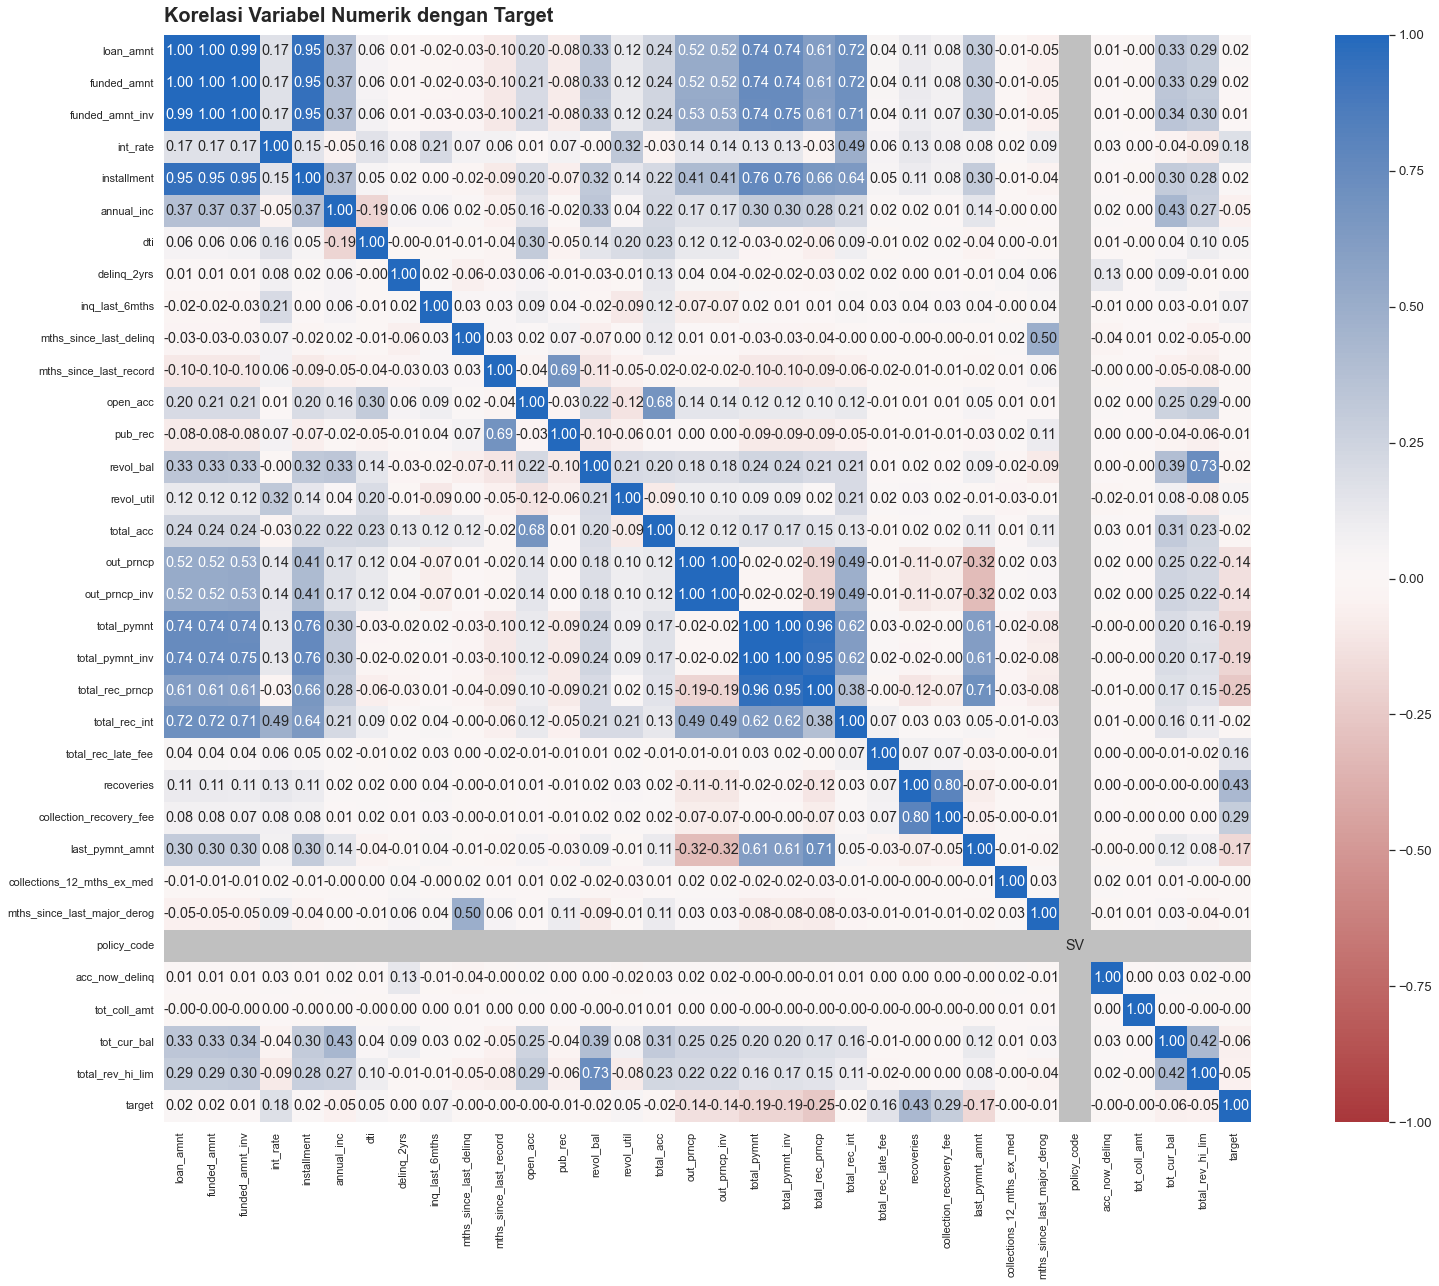

In [22]:
from dython.nominal import associations
data = df_train.loc[:, df_train.dtypes!=np.object]
fig, ax = plt.subplots(figsize =(30,20))
sns.set(font_scale=1.2)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Numerik dengan Target",fontsize=20,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

- Kolom/variabel yang memiliki korelasi >0.7 dan mendekati 0.7 (kecuali dengan target) akan didrop, karena terjadi multikolinearitas

In [23]:
delete = ['collection_recovery_fee','funded_amnt_inv', 'funded_amnt','last_pymnt_amnt', 'loan_amnt','out_prncp_inv',\
          'installment','total_pymnt','total_pymnt_inv','total_rec_int', 'revol_bal','policy_code','open_acc','mths_since_last_record']
df_train = df_train.drop(delete, axis=1)

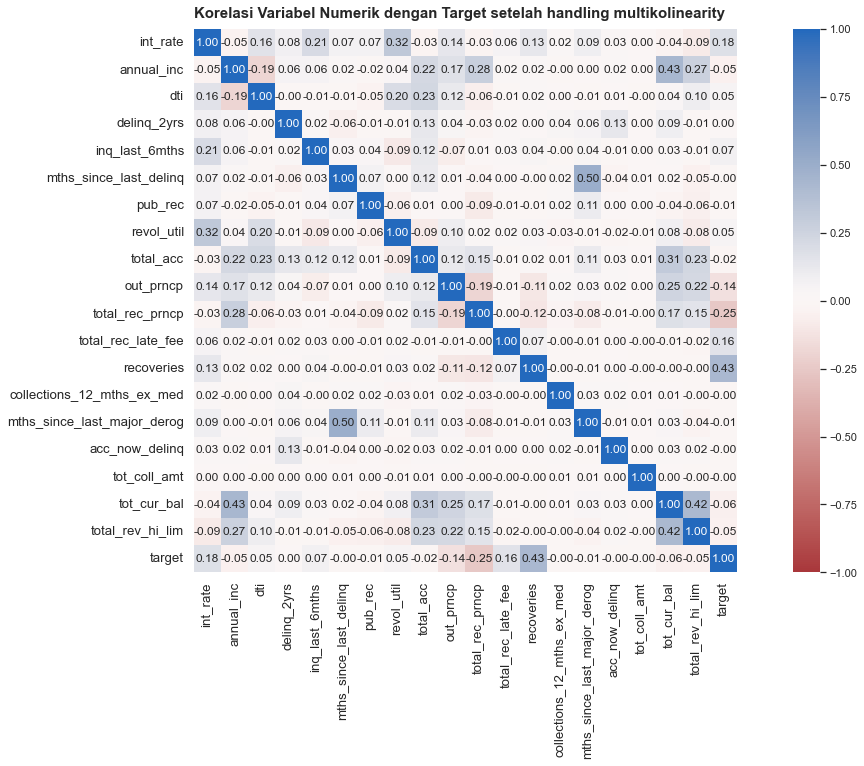

In [24]:
from dython.nominal import associations
data = df_train.loc[:, df_train.dtypes!=np.object]
fig, ax = plt.subplots(figsize =(20,10))
sns.set(font_scale=1)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Numerik dengan Target setelah handling multikolinearity",fontsize=15,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

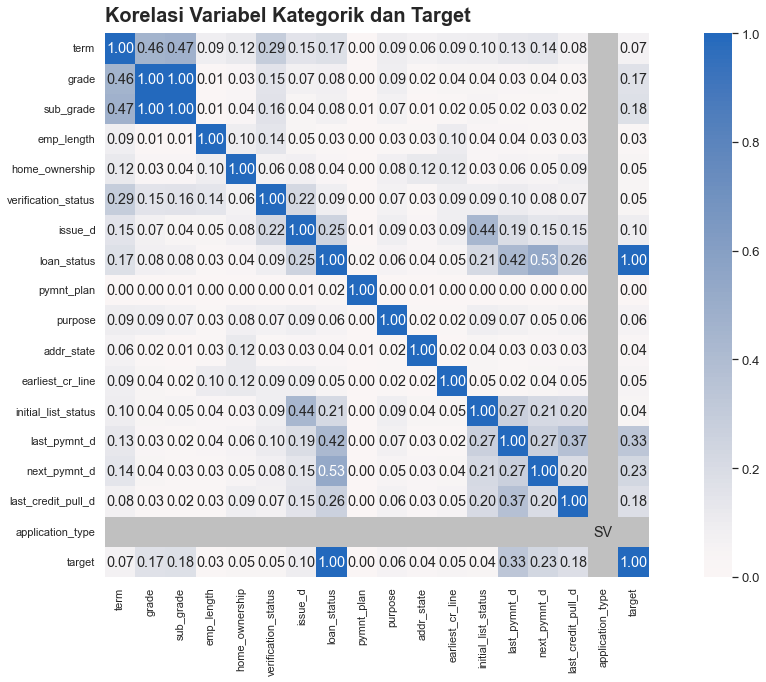

In [25]:
from dython.nominal import associations
data = df_train.loc[:, df_train.dtypes==np.object]
data['target'] = df_train['target']
fig, ax = plt.subplots(figsize =(20,10))
sns.set(font_scale=1.2)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Kategorik dan Target",fontsize=20,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

- Variabel grade dan subgrade memiliki hubungan multikolinearitas, sehingga akan didrop salah satu. Dalam hal ini variabel sub_grade meskipun memiliki korelasi dengan target lebih rendah dibandingkan grade. Namun cardinalitynya sangat tinggi
- Variabel application_type juga akan didrop/dihapus karena tidak memiliki hubungan sama sekali dengan semua variabel kategorik
- Loan Status nantinya akan didrop karena variabel target merupakan fitur extraction dari variabel loan status

In [26]:
df_train = df_train.drop(['application_type', 'sub_grade','loan_status'], axis=1)

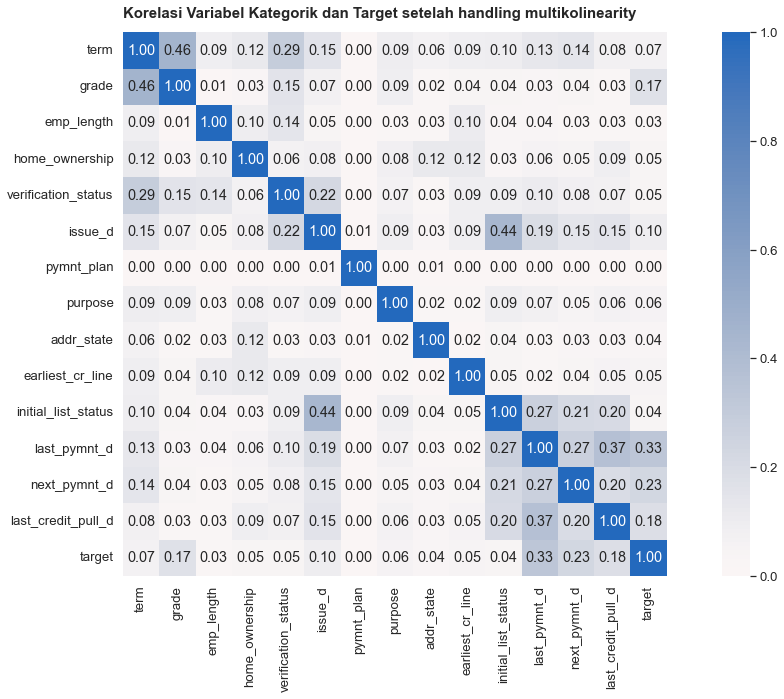

In [27]:
from dython.nominal import associations
data = df_train.loc[:, df_train.dtypes==np.object]
data['target'] = df_train['target']
fig, ax = plt.subplots(figsize =(20,10))
sns.set(font_scale=1.2)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Kategorik dan Target setelah handling multikolinearity",fontsize=15,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

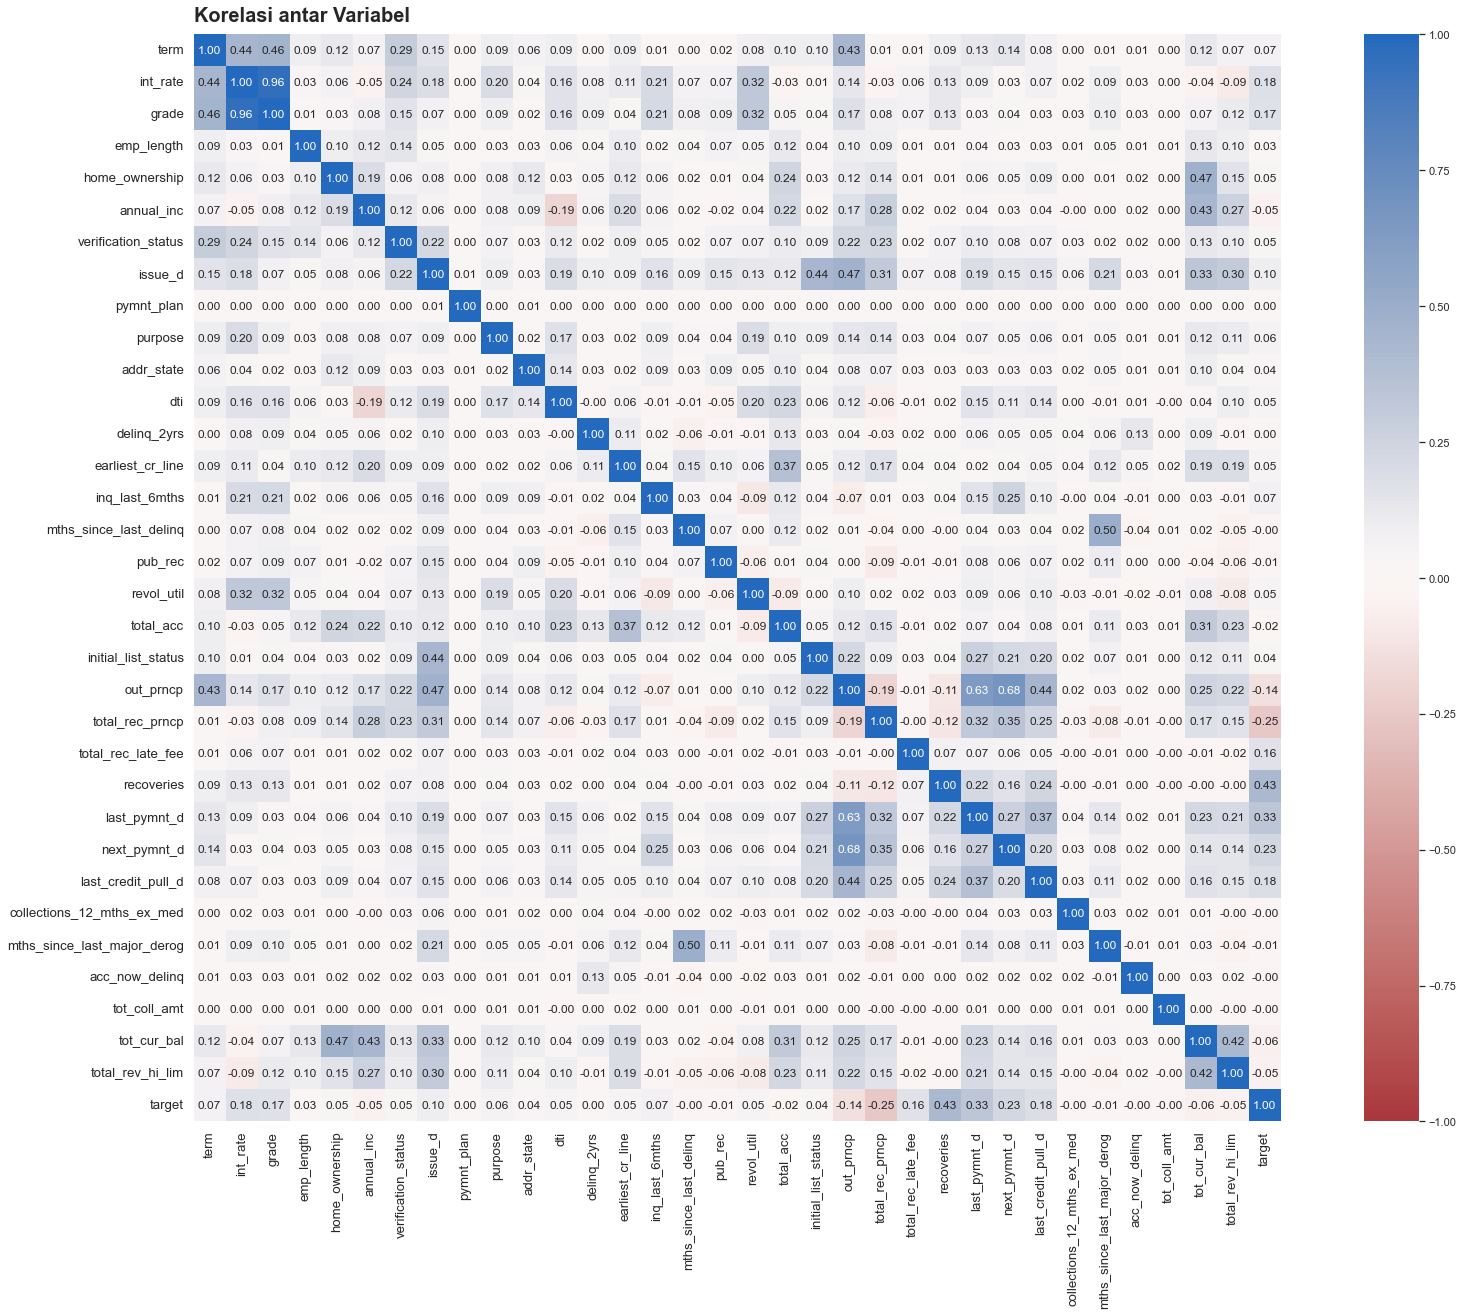

In [28]:
from dython.nominal import associations
data = df_train
fig, ax = plt.subplots(figsize =(30,20))
sns.set(font_scale=1)
plt.text(x=0,y=-0.4,s="Korelasi antar Variabel",fontsize=20,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

- Akan dilakukan drop pada variabel grade karena terjadi multikolinearity dengan int_rate, variabel grade memiliki korelasi yang lebih rendah dengan target dibandingkan int_rate
- Variabel last_pymnt_d dan next_pymnt_d juga akan didrop karena memiliki multikolinearity dengan out_prncp

In [29]:
df_train = df_train.drop(['grade','last_pymnt_d','next_pymnt_d'], axis=1)

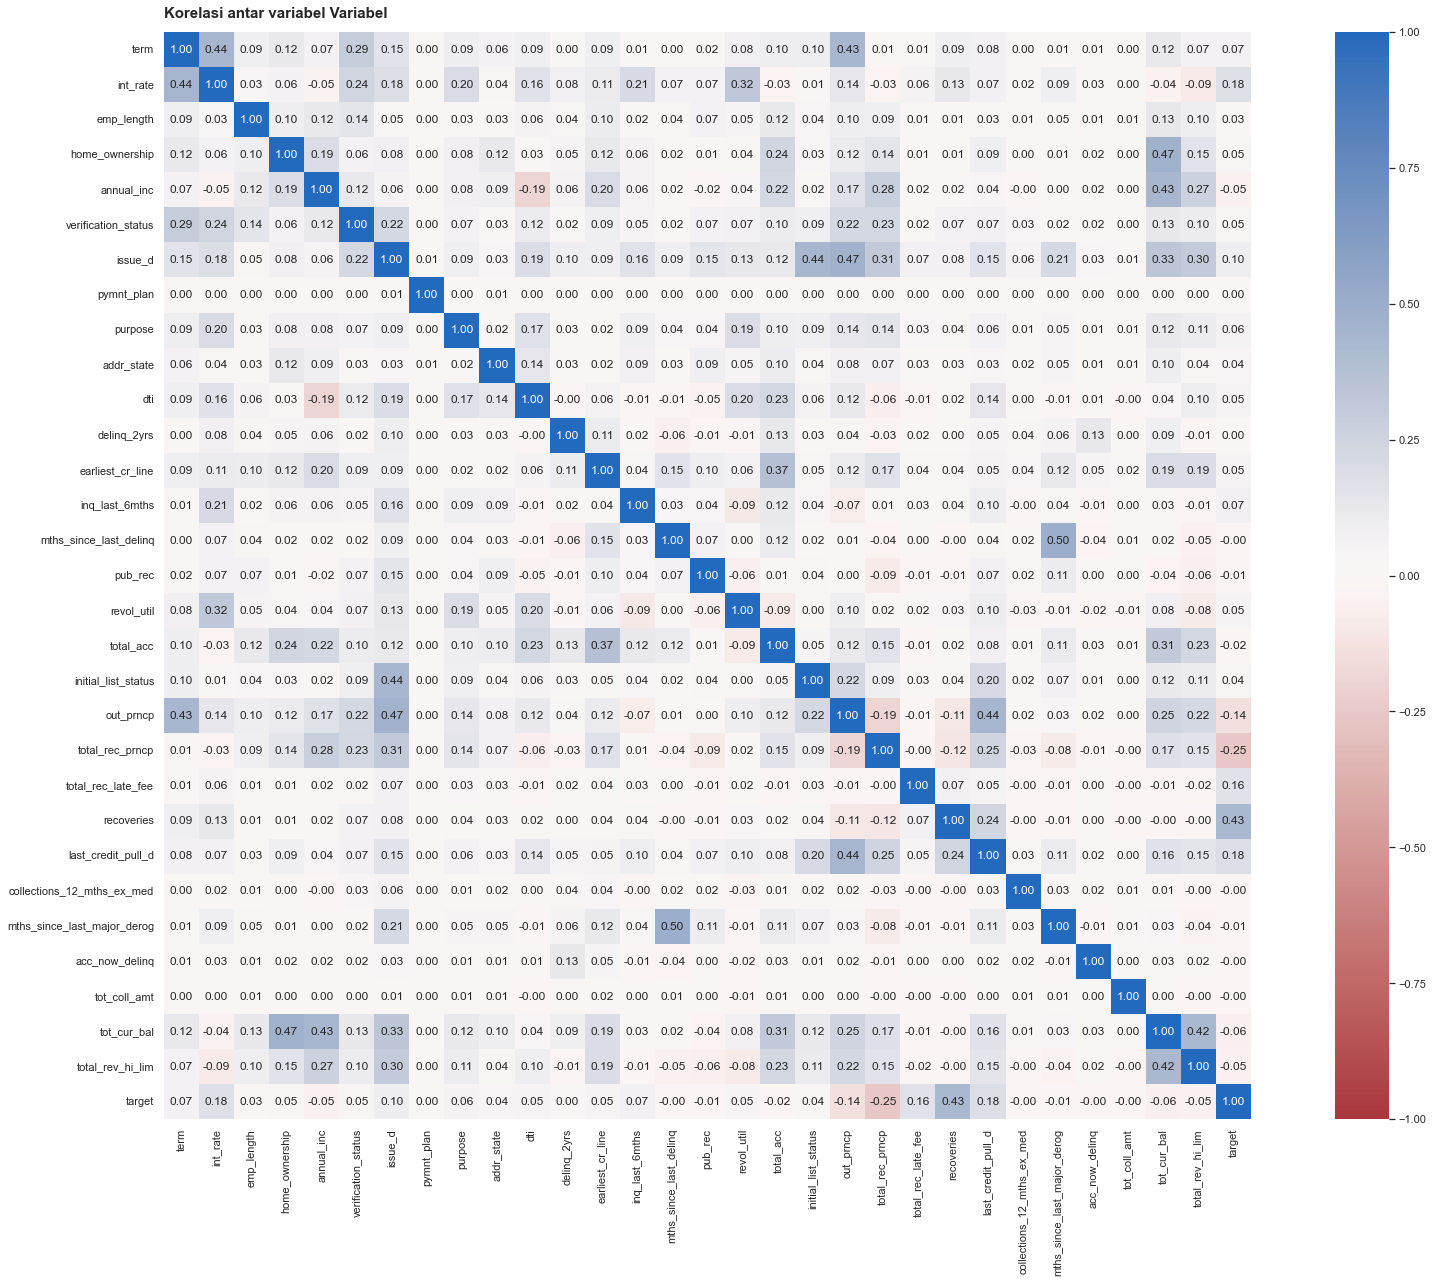

In [30]:
from dython.nominal import associations
data = df_train
fig, ax = plt.subplots(figsize =(30,20))
sns.set(font_scale=1)
plt.text(x=0,y=-0.4,s="Korelasi antar variabel Variabel",fontsize=15,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(data, nom_nom_assoc = 'cramer',cmap = "vlag_r", ax=ax)
plt.show()

# Data Preprocessing

## Handling Missing Value

In [31]:
var_null = df_train.isnull().sum()/df_train.shape[0]*100
var_null = var_null.reset_index()
var_null.columns = ['Variabel/Kolom', '% NA']
var_null = var_null.sort_values(by='% NA', ascending=False)
var_null = var_null[var_null['% NA']>0]
list = []
fitur = var_null['Variabel/Kolom'].unique()
for i in range(0, len(var_null['Variabel/Kolom'])):
    x = df[fitur[i]].dtypes
    list.append(x)
var_null['Tipe Data'] = list
var_null

Variabel/Kolom       % NA Tipe Data
25  mths_since_last_major_derog  78.773926   float64
14       mths_since_last_delinq  53.690554   float64
29             total_rev_hi_lim  15.071469   float64
28                  tot_cur_bal  15.071469   float64
27                 tot_coll_amt  15.071469   float64
2                    emp_length   4.505399    object
16                   revol_util   0.072917   float64
24   collections_12_mths_ex_med   0.031097   float64
23           last_credit_pull_d   0.009007    object
12             earliest_cr_line   0.006219    object
17                    total_acc   0.006219   float64
13               inq_last_6mths   0.006219   float64
15                      pub_rec   0.006219   float64
11                  delinq_2yrs   0.006219   float64
26               acc_now_delinq   0.006219   float64
4                    annual_inc   0.000858   float64

- Variabel 'mths_since_last_major_derog' dan 'mths_since_last_delinq' akan didrop karena memiliki missing value mendekati dan lebih dari 50% 
- persentase Missing Value < 1% pada variabel/kolom akan didrop
- Missing Value pada variabel/kolom 'total_rev_hi_lim'/ batas kredit tertinggi, tot_cur_bal dan 'tot_coll_amt' akan diinput dengan median
- Missing Value pada variabel/kolom 'emp_length' akan diinput dengan '<1 year'

In [32]:
df_train = df_train.drop(['mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1)
df_train['total_rev_hi_lim'].fillna(df_train['total_rev_hi_lim'].quantile(0.5), inplace=True)
df_train['tot_coll_amt'].fillna(df_train['tot_coll_amt'].quantile(0.5), inplace=True)
df_train['tot_cur_bal'].fillna(df_train['tot_cur_bal'].quantile(0.5), inplace=True)
df_train['emp_length'].fillna('< 1 year', inplace=True)

In [33]:
df_train = df_train.dropna(how='any',axis=0)

In [34]:
df_train.isnull().sum()

term                          0
int_rate                      0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
pub_rec                       0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_prncp               0
total_rec_late_fee            0
recoveries                    0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
target                        0
dtype: int64

In [35]:
print('Total baris sebelum dihapus missing value:', df.shape)
print('Total baris setelah dihapus missing value:', df_train.shape)

Total baris sebelum dihapus missing value: (466285, 50)
Total baris setelah dihapus missing value: (465792, 29)


- Sudah tidak ada missing value

## Feature Selection

### Anova Test

In [36]:
yes_target = df_train[df_train["target"]==1]
no_target = df_train[df_train["target"]==0]
list=[]
list_kolom = []
fitur = df_train.select_dtypes(exclude=[object]).columns
for i in fitur:
    stat, p= st.f_oneway(yes_target[i], no_target[i])
    list.append(p)
list
print('Hasil Uji Statistik ANOVA :')
for i in range(0,len(fitur)):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,fitur[i],'p-value',list[i])
        kolom = fitur[i]
        list_kolom.append(kolom)
    else:
        result =  "Terima H1"
        print(result,fitur[i],'p-value',list[i])
print("")
print('Kolom numerik yang akan didrop berdasarkan uji statistik')
print(list_kolom)

Hasil Uji Statistik ANOVA :
Terima H1 int_rate p-value 0.0
Terima H1 annual_inc p-value 4.465375319425535e-239
Terima H1 dti p-value 1.0620838876559377e-268
Terima H1 delinq_2yrs p-value 0.001277313268081568
Terima H1 inq_last_6mths p-value 0.0
Terima H1 pub_rec p-value 7.241595741954432e-08
Terima H1 revol_util p-value 1.6735366589236232e-302
Terima H1 total_acc p-value 1.3258142992343946e-48
Terima H1 out_prncp p-value 0.0
Terima H1 total_rec_prncp p-value 0.0
Terima H1 total_rec_late_fee p-value 0.0
Terima H1 recoveries p-value 0.0
Terima H1 collections_12_mths_ex_med p-value 0.004736417174139216
Terima H0 acc_now_delinq p-value 0.7855545405116996
Terima H0 tot_coll_amt p-value 0.378340403123845
Terima H1 tot_cur_bal p-value 3.682196525019263e-285
Terima H1 total_rev_hi_lim p-value 1.1533555817912072e-155
Terima H1 target p-value 0.0

Kolom numerik yang akan didrop berdasarkan uji statistik
['acc_now_delinq', 'tot_coll_amt']


- Variabel 'acc_now_delinq', 'tot_coll_amt' tidak berpengaruh terhadap target sedemikian sehingga akan didrop
- Selain itu variabel recoveries akan didrop karena variabel tersebut terkait rencana pembayaran, dan asumsi ketika calon nasabah akan mengajukan pinjaman belum ada rencana pembayaran saat hari itu
- Selanjutnya, akan dilakukan drop pada variabel numerik yang tidak memiliki pengaruh dengan variabel target

In [37]:
df_train = df_train.drop(['acc_now_delinq', 'tot_coll_amt','recoveries'], axis=1)

### Chi-Square

In [38]:
from scipy.stats import chi2_contingency
list=[]
categorical = df_train.loc[:, df_train.dtypes==np.object].columns.tolist()

for i in categorical:
    ctab = pd.crosstab(df_train[i], df_train['target'])
    stat, p, dof, expected = chi2_contingency(ctab)
    list.append(p)
list

print()
print('Hasil Uji Statistik Chi-Square :')
for i in range(0,9):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,categorical[i],'p-value',list[i])

    else:
        result =  "Terima H1"
        print(result,categorical[i],'p-value',list[i])


Hasil Uji Statistik Chi-Square :
Terima H1 term p-value 0.0
Terima H1 emp_length p-value 9.998872569795454e-55
Terima H1 home_ownership p-value 8.051140733398643e-217
Terima H1 verification_status p-value 5.575785344731395e-217
Terima H1 issue_d p-value 0.0
Terima H1 pymnt_plan p-value 0.010562761293325708
Terima H1 purpose p-value 0.0
Terima H1 addr_state p-value 2.4042036919937905e-91
Terima H1 earliest_cr_line p-value 5.052443132239426e-52


- Semua variabel kategorik memiliki hubungan dengan variabel target

In [39]:
fitur = df_train.loc[:, df_train.dtypes==np.object].columns.tolist()
list = []
list2= []
list3 = []
for i in range(0, len(fitur)):
    x = df_train[fitur[i]].nunique()
    y = df_train[fitur[i]].unique()
    z = fitur[i]
    list.append(x)
    list2.append(z)
    list3.append(y)
    
var = pd.DataFrame({
        'Fitur': list2,
        'Nunique' : list,
        'Unique' : list3})
var = var.sort_values(by = 'Nunique', ascending=False)
var

Fitur  Nunique  \
8      earliest_cr_line      664   
10   last_credit_pull_d      100   
4               issue_d       89   
7            addr_state       50   
6               purpose       14   
1            emp_length       11   
2        home_ownership        6   
3   verification_status        3   
0                  term        2   
5            pymnt_plan        2   
9   initial_list_status        2   

                                               Unique  
8   [Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-0...  
10  [Jan-16, Sep-13, Jan-15, Sep-15, Dec-14, Aug-1...  
4   [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...  
7   [AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, F...  
6   [credit_card, car, small_business, other, wedd...  
1   [10+ years, < 1 year, 1 year, 3 years, 8 years...  
2             [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]  
3           [Verified, Source Verified, Not Verified]  
0                            [ 36 months,  60 months]  
5                                              [n, y]  
9                                              [f, w]

- Variabel addr_state memiliki cardinality yang sangat tinggi oleh karena itu akan didrop

Beberapa informasi terkait variabel berikut :
- issue_d merupakan bulan dimana pinjaman tersebut didanai oleh perusahaan. 
- last_credit_pull_d terakhir perusahaan menge'check' credit history.
- pymnt_plan merupakan rencana pembayaran terhadap angsuran

Fitur-fitur tersebut akan didrop dengan alasan bahwa asumsinya ketika ada pengajuan/aplikasi masuk, belum diketahui apakah pengajuan tersebut akan disetujui atau tidak sebelum diaplikasikan ke model.

In [40]:
df_train = df_train.drop(['addr_state','issue_d', 'last_credit_pull_d', 'pymnt_plan'], axis=1)

## Handling Outlier

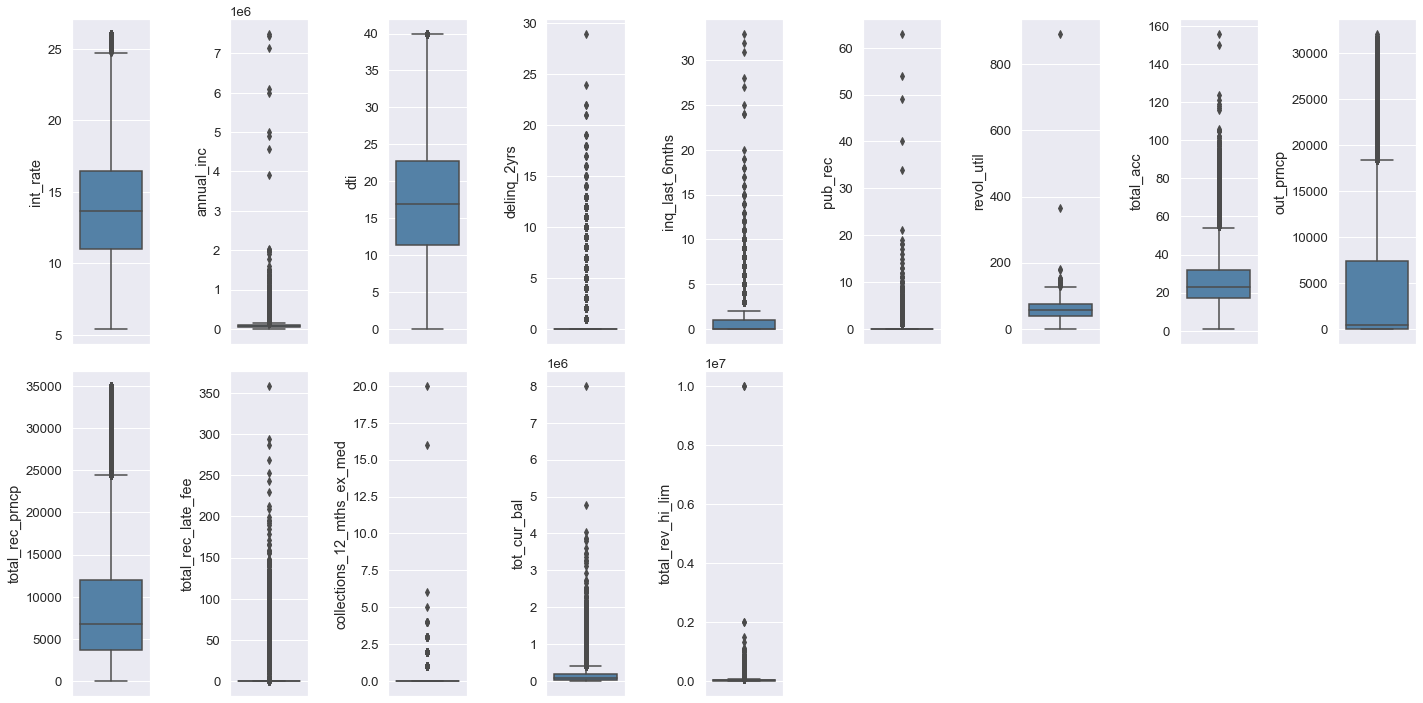

In [41]:
features = df_train.loc[:, df_train.dtypes!=np.object].columns.tolist()
features.remove('target')

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20,10)
    sns.set(font_scale=1.2)
    plt.subplot(2,9,i+1)
    sns.boxplot(y=df_train[features[i]], color='Steelblue')
    plt.ylabel(features[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

- Beberapa variabel memiliki outlier, sebelum dilakukan drop terlebih dahulu akan dilakukan cek apakah outlier tersebut bertipe 'Global Outlier'. Jika outlier bertipe Global Outlier maka akan dilakukan drop

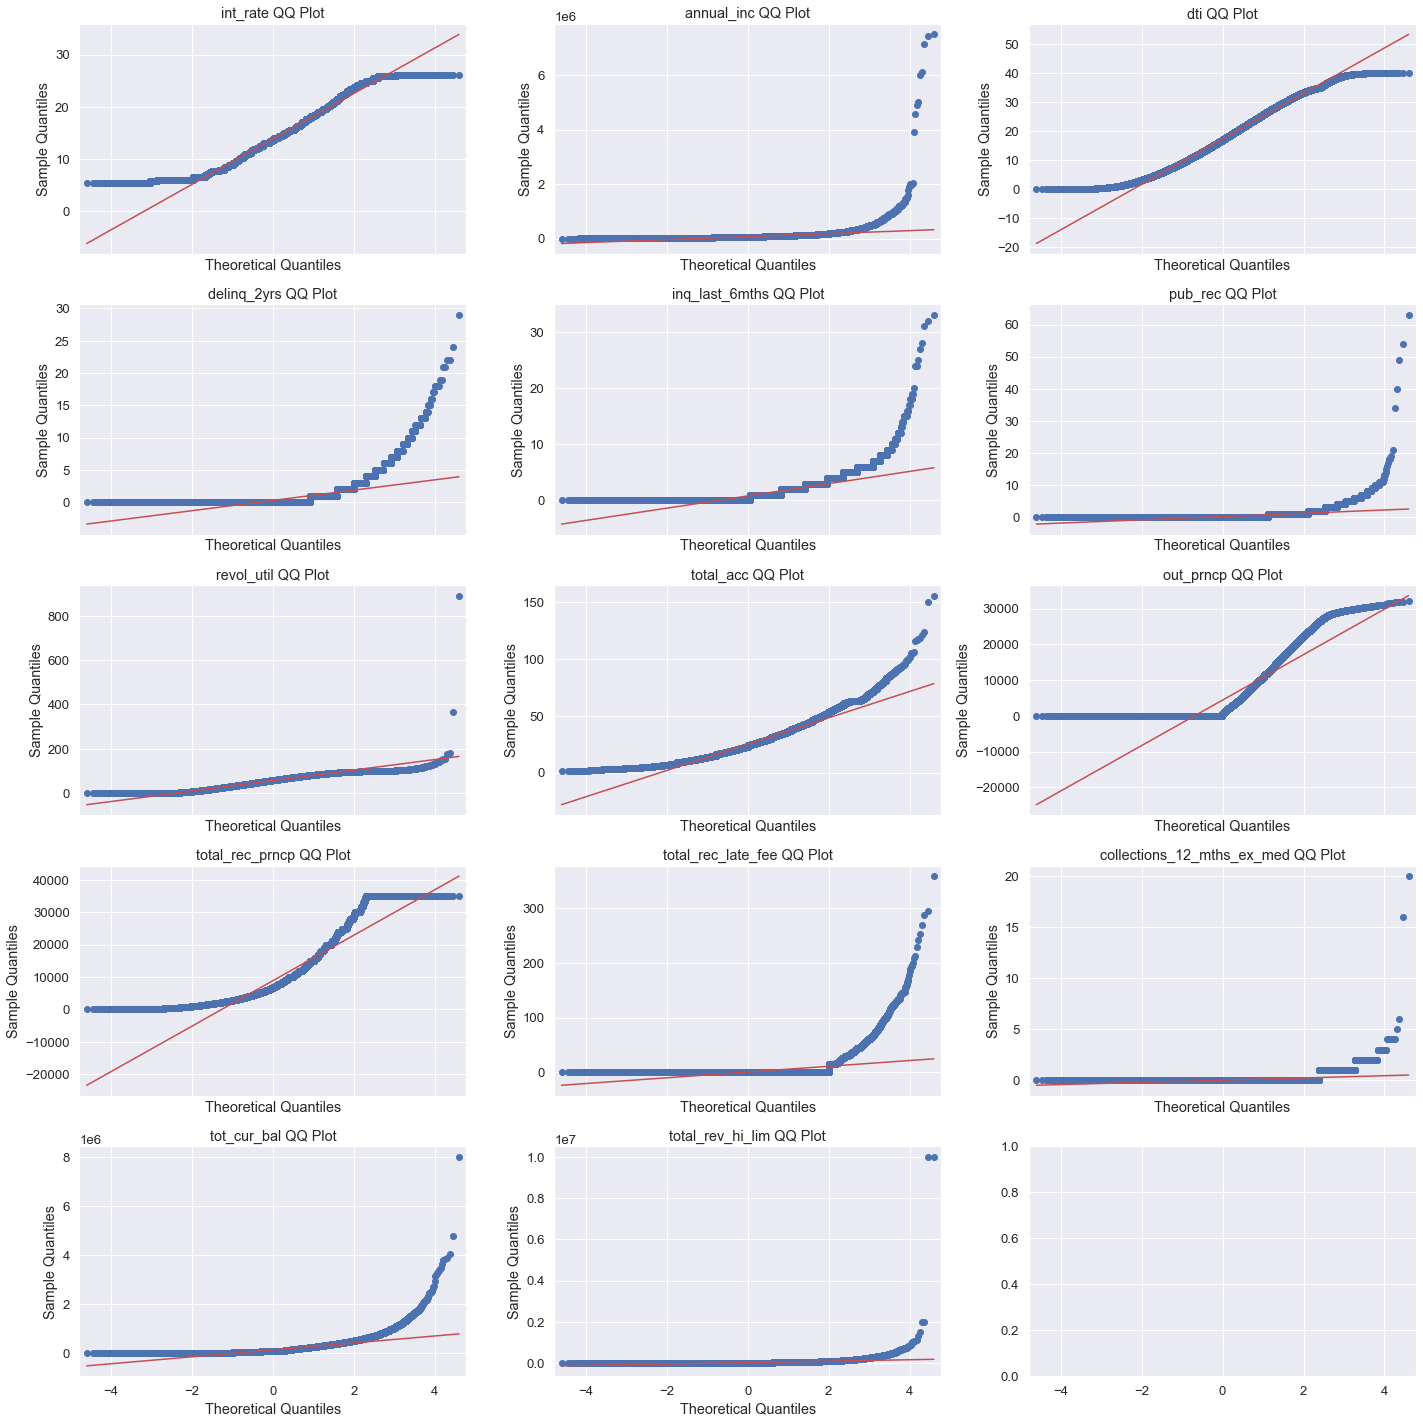

In [42]:
import statsmodels.api as sm
features = df_train.loc[:, df_train.dtypes!=np.object].columns.tolist()
features.remove('target')

fig, axes = plt.subplots(ncols=3, nrows=5, sharex=True, figsize=(20, 20))
for i, ax in zip(features, np.ravel(axes)):
    sm.qqplot(df_train[i], line='s', ax=ax)
    ax.set_title(f'{i} QQ Plot')
    plt.tight_layout()

In [43]:
train = df_train.copy()

In [44]:
train = train[train['annual_inc']<2500000]
train = train[train['delinq_2yrs']<25]
train = train[train['pub_rec']<20]
train = train[train['revol_util']<175]
train = train[train['total_acc']<140]
train = train[train['total_rec_late_fee']<300]
train = train[train['collections_12_mths_ex_med']<5]
train = train[train['tot_cur_bal']<4500000]
train = train[train['total_rev_hi_lim']<1200000]

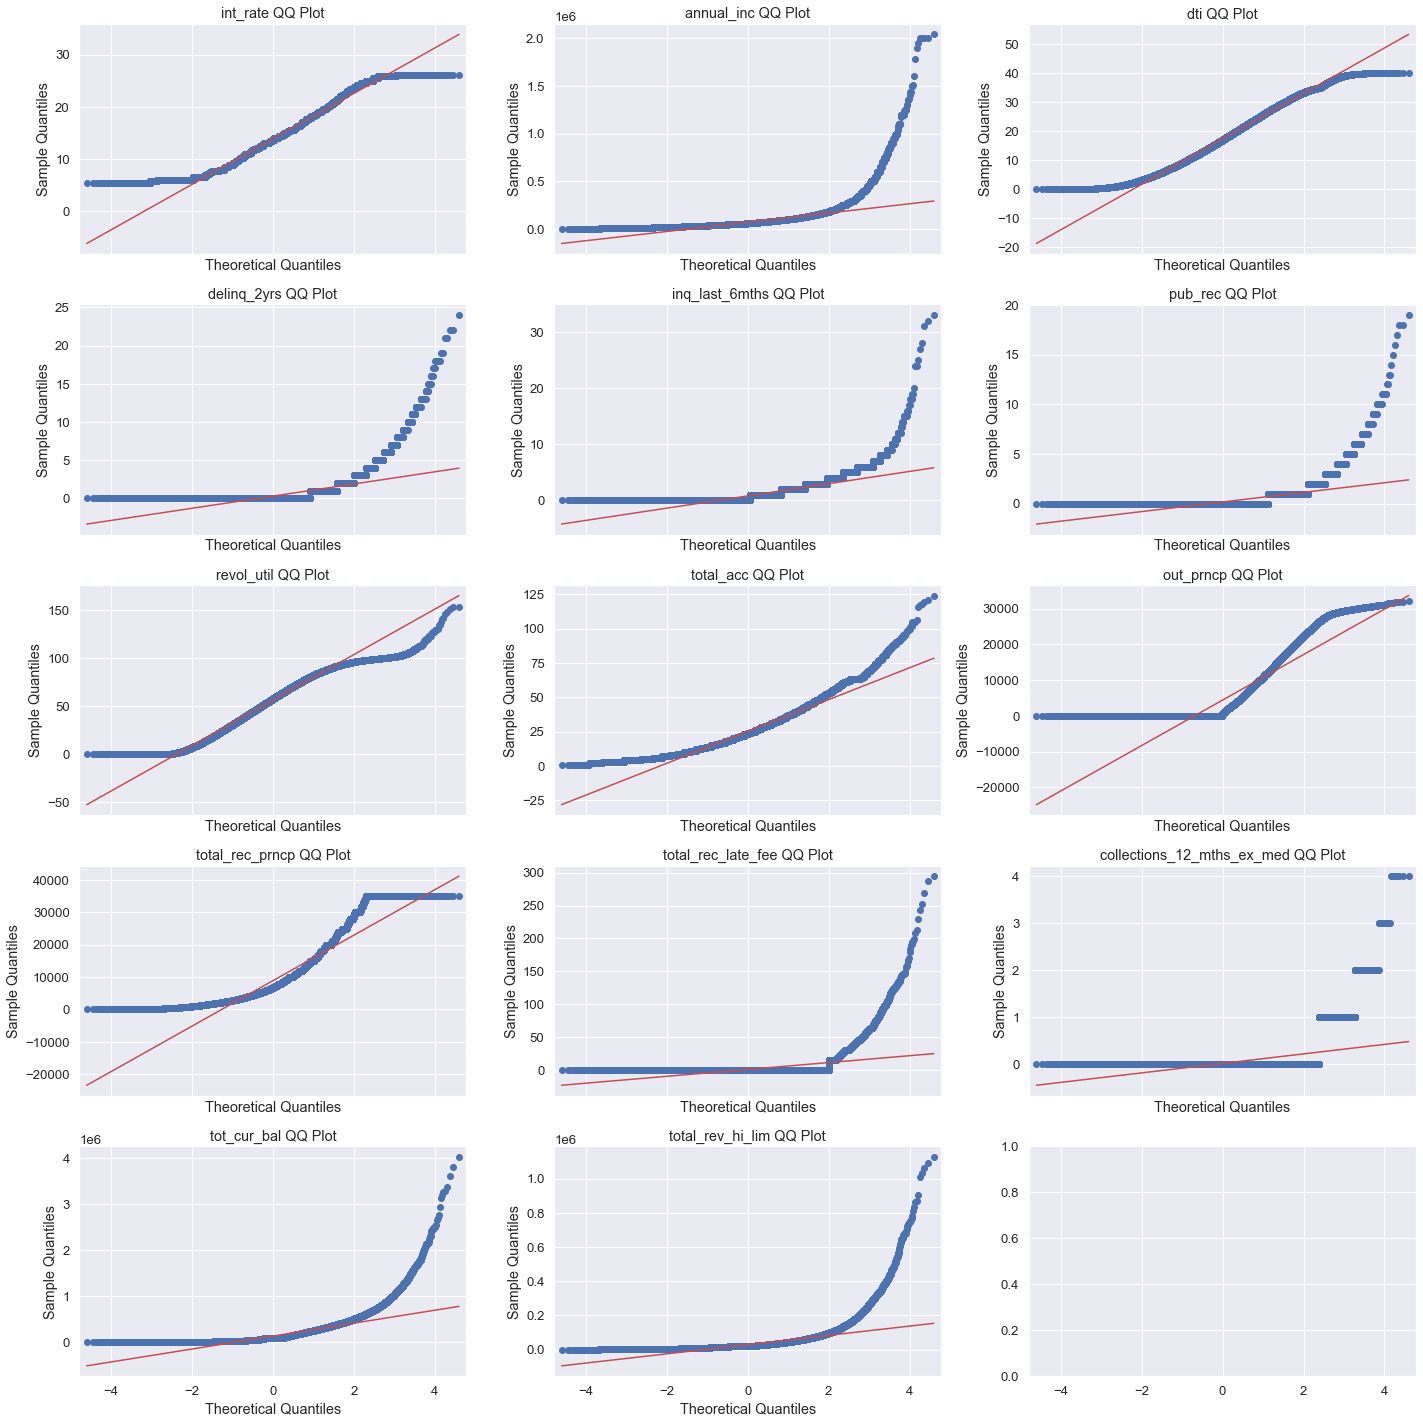

In [45]:
import statsmodels.api as sm
features = train.loc[:, train.dtypes!=np.object].columns.tolist()
features.remove('target')

fig, axes = plt.subplots(ncols=3, nrows=5, sharex=True, figsize=(20, 20))
for i, ax in zip(features, np.ravel(axes)):
    sm.qqplot(train[i], line='s', ax=ax)
    ax.set_title(f'{i} QQ Plot')
    plt.tight_layout()

## Feature Engineering

- Akan dilakukan feature engineering dengan tujuan menyederhanakan beberapa tipe variabel pada variabel kategorik dan melakukan extraction pada variabel bertipe datetime

In [46]:
fitur = train.loc[:, train.dtypes==np.object].columns.tolist()
list = []
list2= []
list3 = []
for i in range(0, len(fitur)):
    x = train[fitur[i]].nunique()
    y = train[fitur[i]].unique()
    z = fitur[i]
    list.append(x)
    list2.append(z)
    list3.append(y)
    
var = pd.DataFrame({
        'Fitur': list2,
        'Nunique' : list,
        'Unique' : list3})
var = var.sort_values(by = 'Nunique', ascending=False)
var

Fitur  Nunique  \
5     earliest_cr_line      664   
4              purpose       14   
1           emp_length       11   
2       home_ownership        6   
3  verification_status        3   
0                 term        2   
6  initial_list_status        2   

                                              Unique  
5  [Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-0...  
4  [credit_card, car, small_business, other, wedd...  
1  [10+ years, < 1 year, 1 year, 3 years, 8 years...  
2            [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]  
3          [Verified, Source Verified, Not Verified]  
0                           [ 36 months,  60 months]  
6                                             [f, w]

- Pada variabel home_ownership terdapat beberapa kategori yaitu Rent, Own, Mortgage, None, Any dan Other. Pada kategori/kelompok None dan Any akan dijadikan satu kategori dengan 'Other'

In [47]:
train['home_ownership'] = np.where(train['home_ownership']=='RENT', 'RENT',
                                  np.where(train['home_ownership']=='OWN', 'OWN',
                                          np.where(train['home_ownership']=='MORTGAGE','MORTGAGE', 'OTHER')))

- Pada variabel/kolom purpose akan direduce menjadi 2 kategori yaitu purpose untuk produktif dan multiguna. Dimana purpose credit yang masih terkait dengan usaha/ bisnis akan masuk pada kategori 'produktif' dan selain untuk kegiatan usaha/ bisnis akan masuk pada kategori 'multiguna'

In [48]:
train['purpose'] = np.where(train['purpose']=='small_business', 'produktif',
                           np.where(train['purpose']=='renewable_energy', 'produktif', 'multiguna'))

- Pada variabel/kolom 'term' yang merupakan tenor calon nasabah mengajukan pinjaman sebelumnya memiliki unique value '36 months' dan '60 months' akan diubah menjadi format tahun. 

In [49]:
train['term'] = np.where(train['term']==' 36 months', 3, 5)

- Pada variabel/kolom 'earliest_cr_line' yang merupakan informasi dimana nasabah pertama kali melakukan pengajuan credit akan dilakukan extraction yaitu dengan mengambil informasi tahunnya 

In [50]:
train = train.reset_index()
train = train.drop('index', axis=1)

In [51]:
from datetime import datetime
list = []
fitur = train.shape[0]
for i in range(0, fitur):
    x = datetime.strptime(train['earliest_cr_line'][i], '%b-%y').strftime('%b-%Y')
    list.append(x)

In [52]:
train['earliest_date'] = list
train['earliest_date'] = pd.to_datetime(train['earliest_date'])

In [53]:
train['earliest_year'] = datetime.today().year - train['earliest_date'].dt.year - \
                        (datetime.today().month < train['earliest_date'].dt.month)

In [54]:
train = train.drop('earliest_date', axis=1)

- Setelah dilakukan feature extraction pada variabel earliest_cr_line, maka variabel tersebut akan didrop

In [55]:
train = train.drop('earliest_cr_line', axis=1)

In [56]:
train = train[train['earliest_year']>=0]

In [57]:
train.head()

term  int_rate emp_length home_ownership  annual_inc verification_status  \
0     3     10.65  10+ years           RENT     24000.0            Verified   
1     5     15.27   < 1 year           RENT     30000.0     Source Verified   
2     3     15.96  10+ years           RENT     12252.0        Not Verified   
3     3     13.49  10+ years           RENT     49200.0     Source Verified   
4     5     12.69     1 year           RENT     80000.0     Source Verified   

     purpose    dti  delinq_2yrs  inq_last_6mths  pub_rec  revol_util  \
0  multiguna  27.65          0.0             1.0      0.0        83.7   
1  multiguna   1.00          0.0             5.0      0.0         9.4   
2  produktif   8.72          0.0             2.0      0.0        98.5   
3  multiguna  20.00          0.0             1.0      0.0        21.0   
4  multiguna  17.94          0.0             0.0      0.0        53.9   

   total_acc initial_list_status  out_prncp  total_rec_prncp  \
0        9.0                   f        0.0          5000.00   
1        4.0                   f        0.0           456.46   
2       10.0                   f        0.0          2400.00   
3       37.0                   f        0.0         10000.00   
4       38.0                   f      766.9          2233.10   

   total_rec_late_fee  collections_12_mths_ex_med  tot_cur_bal  \
0                0.00                         0.0      81539.0   
1                0.00                         0.0      81539.0   
2                0.00                         0.0      81539.0   
3               16.97                         0.0      81539.0   
4                0.00                         0.0      81539.0   

   total_rev_hi_lim  target  earliest_year  
0           22800.0       0             38  
1           22800.0       1             23  
2           22800.0       0             21  
3           22800.0       0             26  
4           22800.0       0             27

In [58]:
train = train.reset_index()
train = train.drop('index', axis=1)
train.shape[0]

464590

In [59]:
train.duplicated().sum()

0

# Top Insight

In [60]:
train.describe()

term       int_rate    annual_inc            dti  \
count  464590.000000  464590.000000  4.645900e+05  464590.000000   
mean        3.550744      13.831148  7.313261e+04      17.223855   
std         0.893404       4.357841  4.831032e+04       7.848211   
min         3.000000       5.420000  1.896000e+03       0.000000   
25%         3.000000      10.990000  4.500000e+04      11.370000   
50%         3.000000      13.660000  6.300000e+04      16.880000   
75%         5.000000      16.490000  8.876750e+04      22.790000   
max         5.000000      26.060000  2.039784e+06      39.990000   

         delinq_2yrs  inq_last_6mths        pub_rec     revol_util  \
count  464590.000000   464590.000000  464590.000000  464590.000000   
mean        0.284165        0.804460       0.159646      56.189658   
std         0.795347        1.089972       0.482504      23.690732   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000       0.000000      39.300000   
50%         0.000000        0.000000       0.000000      57.600000   
75%         0.000000        1.000000       0.000000      74.700000   
max        24.000000       33.000000      19.000000     153.000000   

           total_acc      out_prncp  total_rec_prncp  total_rec_late_fee  \
count  464590.000000  464590.000000    464590.000000       464590.000000   
mean       25.061756    4410.434679      8868.715870            0.646915   
std        11.594170    6354.422086      7030.901428            5.225580   
min         1.000000       0.000000         0.000000            0.000000   
25%        17.000000       0.000000      3711.825000            0.000000   
50%        23.000000     444.765000      6823.530000            0.000000   
75%        32.000000    7344.380000     12000.000000            0.000000   
max       124.000000   32160.380000     35000.030000          294.680000   

       collections_12_mths_ex_med   tot_cur_bal  total_rev_hi_lim  \
count               464590.000000  4.645900e+05      4.645900e+05   
mean                     0.008993  1.300728e+05      2.915789e+04   
std                      0.101395  1.405080e+05      2.697352e+04   
min                      0.000000  0.000000e+00      1.000000e+02   
25%                      0.000000  3.361425e+04      1.500000e+04   
50%                      0.000000  8.153900e+04      2.280000e+04   
75%                      0.000000  1.849210e+05      3.430000e+04   
max                      4.000000  4.026405e+06      1.127900e+06   

              target  earliest_year  
count  464590.000000  464590.000000  
mean        0.115956      24.768213  
std         0.320173       7.070122  
min         0.000000      11.000000  
25%         0.000000      20.000000  
50%         0.000000      23.000000  
75%         0.000000      28.000000  
max         1.000000      54.000000

In [61]:
train.loc[:, train.dtypes=='object'].describe()

emp_length home_ownership verification_status    purpose  \
count      464590         464590              464590     464590   
unique         11              4                   3          2   
top     10+ years       MORTGAGE            Verified  multiguna   
freq       149569         234965              167285     457260   

       initial_list_status  
count               464590  
unique                   2  
top                      f  
freq                301870

In [62]:
df_bi = train.copy()

In [63]:
df_bi['out_prncp_bin'] = np.where(train['out_prncp']<=5000, '0-5000',
                                       np.where(train['out_prncp']<10000,'5001-10000',
                                           np.where(train['out_prncp']<=15000,'10001-15000',
                                                np.where(train['out_prncp']<=20000,'15001-20000',
                                                        np.where(train['out_prncp']<=25000,'20001-25000',
                                                                 np.where(train['out_prncp']<=30000,'25001-30000','>30000'))))))

In [64]:
df_bi['total_rec_prncp_bin'] = np.where(train['total_rec_prncp']<=5000, '0-5.000',
                                       np.where(train['total_rec_prncp']<10000,'5.001-10.000',
                                           np.where(train['total_rec_prncp']<=15000,'10.001-15.000',
                                                np.where(train['total_rec_prncp']<=20000,'15.001-20.000',
                                                        np.where(train['total_rec_prncp']<=25000,'20.001-25.000',
                                                                 np.where(train['total_rec_prncp']<=30000,'25.001-30.000','>30.000'))))))

In [65]:
df_bi['int_rate_bin'] = np.where(train['int_rate']<4, '0-3%',
                                 np.where(train['int_rate']<7, '4%-6%',
                                          np.where(train['int_rate']<10, '7%-9%',
                                                   np.where(train['int_rate']<13, '10%-12%',
                                                            np.where(train['int_rate']<16, '13%-15%',
                                                                     np.where(train['int_rate']<19, '16%-18%',
                                                                              np.where(train['int_rate']<22, '19%-21%',
                                                                                       np.where(train['int_rate']<25, '22%-24%','>25%'))))))))

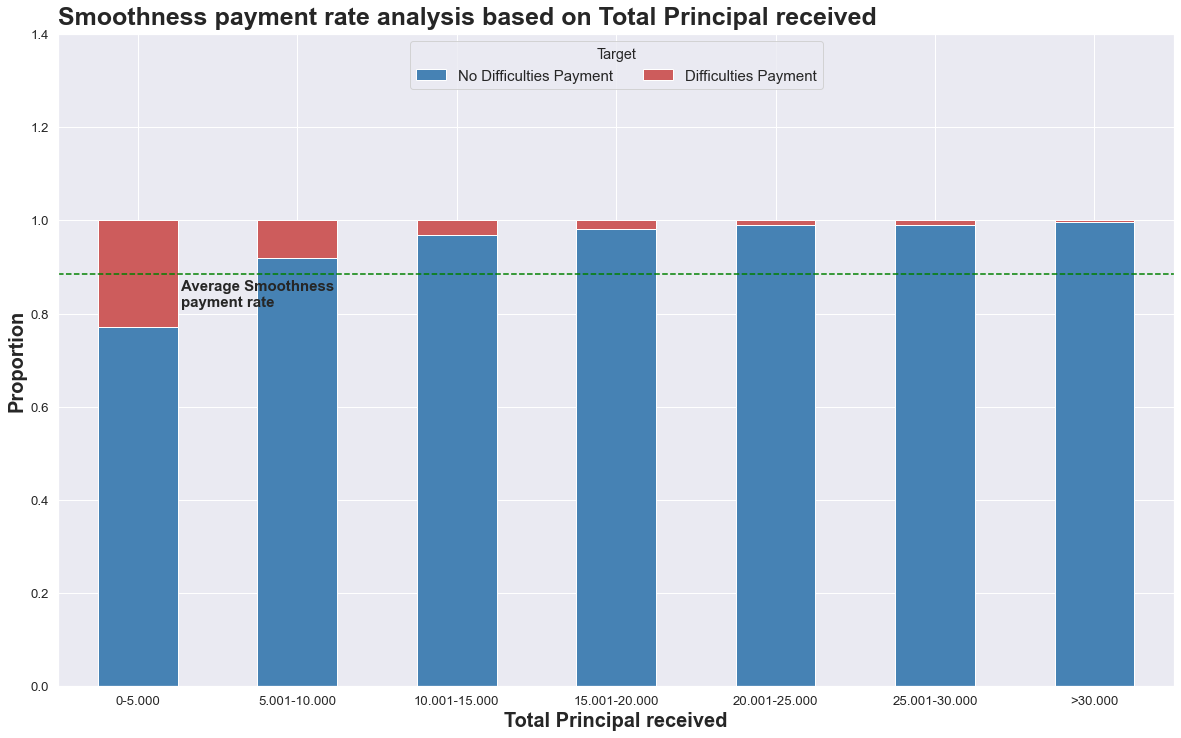

In [66]:
df_rate = df_bi[['total_rec_prncp_bin','target']]
df_rate['target'] = np.where(df_rate['target']==1,'Difficulties Payment','No Difficulties Payment')

cross_tab_prop = pd.crosstab(index=df_rate['total_rec_prncp_bin'],
                             columns=df_rate['target'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]

#Agar Kolom Kategorikal terurut
cross_tab_prop['sort_bin'] = np.where(cross_tab_prop.index=='0-5.000',1,
                              np.where(cross_tab_prop.index=='5.001-10.000',2,
                                      np.where(cross_tab_prop.index=='10.001-15.000',3,
                                              np.where(cross_tab_prop.index=='15.001-20.000',4,
                                                      np.where(cross_tab_prop.index=='20.001-25.000',5,
                                                              np.where(cross_tab_prop.index=='25.001-30.000',6,7))))))
                                     
cross_tab_prop = cross_tab_prop.sort_values(by='sort_bin', ascending=True)
cross_tab_prop = cross_tab_prop.drop('sort_bin', axis=1)
cross_tab_prop

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Steelblue','Indianred'],
                    figsize=(20, 12))

plt.legend(loc="upper center",ncol=5,title='Target', fontsize = 15)
sns.set(font_scale=1.5)
plt.axhline(y = df_bi['target'].value_counts(True)[0], color ="Green", linestyle ="--")
plt.text(x=-0.5,y=1.42,s="Smoothness payment rate analysis based on Total Principal received",fontsize=25,weight='bold')
plt.text(x=0.27,y=cross_tab_prop['No Difficulties Payment'].mean()-0.13,s='Average Smoothness \npayment rate',fontsize=15,weight='bold')
plt.xlabel("Total Principal received",fontsize = 20,weight='bold')
plt.ylabel("Proportion",fontsize = 20,weight='bold')
plt.ylim(0,1.4)
plt.xticks(rotation = 0)
plt.show()

- Semakin banyak total principal received/ total pokok hutang yang telah dibayarkan customer, proporsi keberhasilan pembayarannya juga cenderung tinggi dibandingkan total pokok hutang yang nominalnya lebih kecil. 

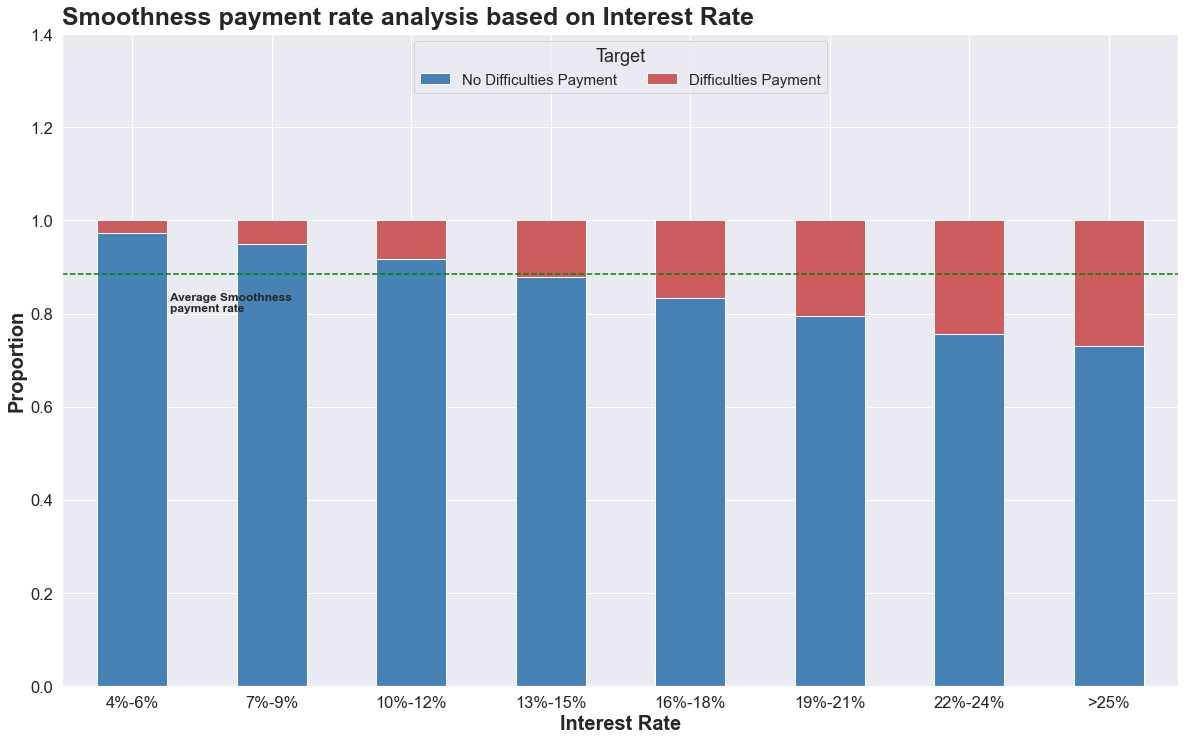

In [67]:
df_rate = df_bi[['int_rate_bin','target']]
df_rate['target'] = np.where(df_rate['target']==1,'Difficulties Payment','No Difficulties Payment')

cross_tab_prop = pd.crosstab(index=df_rate['int_rate_bin'],
                             columns=df_rate['target'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]

#Agar Kolom Kategorikal terurut
cross_tab_prop['sort_bin'] = np.where(cross_tab_prop.index=='0-3%',1,
                              np.where(cross_tab_prop.index=='4%-6%',2,
                                      np.where(cross_tab_prop.index=='7%-9%',3,
                                              np.where(cross_tab_prop.index=='10%-12%',4,
                                                      np.where(cross_tab_prop.index=='13%-15%',5,
                                                              np.where(cross_tab_prop.index=='16%-18%',6,
                                                                       np.where(cross_tab_prop.index=='19%-21%',7,
                                                                                np.where(cross_tab_prop.index=='22%-24%',8,9))))))))
                                     
cross_tab_prop = cross_tab_prop.sort_values(by='sort_bin', ascending=True)
cross_tab_prop = cross_tab_prop.drop('sort_bin', axis=1)
cross_tab_prop

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Steelblue','Indianred'],
                    figsize=(20, 12))

plt.legend(loc="upper center",ncol=5,title='Target', fontsize = 15)
sns.set(font_scale=1.5)
plt.axhline(y = df_bi['target'].value_counts(True)[0], color ="Green", linestyle ="--")
plt.text(x=-0.5,y=1.42,s="Smoothness payment rate analysis based on Interest Rate",fontsize=25,weight='bold')
plt.text(x=0.27,y=cross_tab_prop['No Difficulties Payment'].mean()-0.05,s='Average Smoothness \npayment rate',fontsize=12,weight='bold')
plt.xlabel("Interest Rate",fontsize = 20,weight='bold')
plt.ylabel("Proportion",fontsize = 20,weight='bold')
plt.ylim(0,1.4)
plt.xticks(rotation = 0)
plt.show()

- Semakin besar interest rate atau bunga pinjaman, customer cenderung mengalami kesulitan bayar. Terlihat dari proporsi keberhasilan pembayaran. Dimana bunga pinjaman lebih dari 22%, proporsi customer mengalami kesulitan bayar lebih dari 20%.

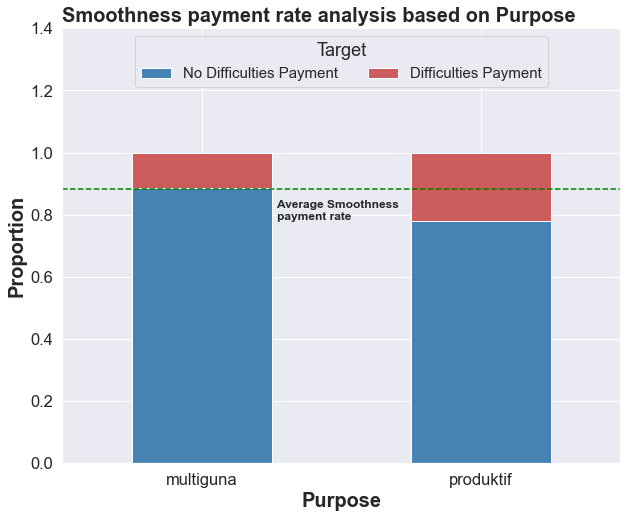

In [68]:
df_rate = df_bi[['purpose','target']]
df_rate['target'] = np.where(df_rate['target']==1,'Difficulties Payment','No Difficulties Payment')

cross_tab_prop = pd.crosstab(index=df_rate['purpose'],
                             columns=df_rate['target'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]


cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Steelblue','Indianred'],
                    figsize=(10, 8))

plt.legend(loc="upper center",ncol=5,title='Target', fontsize = 15)
sns.set(font_scale=1.5)
plt.axhline(y = df_bi['target'].value_counts(True)[0], color ="Green", linestyle ="--")
plt.text(x=-0.5,y=1.42,s="Smoothness payment rate analysis based on Purpose",fontsize=20,weight='bold')
plt.text(x=0.27,y=cross_tab_prop['No Difficulties Payment'].mean()-0.05,s='Average Smoothness \npayment rate',fontsize=12,weight='bold')
plt.xlabel("Purpose",fontsize = 20,weight='bold')
plt.ylabel("Proportion",fontsize = 20,weight='bold')
plt.ylim(0,1.4)
plt.xticks(rotation = 0)
plt.show()

- Customer yang melakukan pengajuan pinjaman dana dengan tujuan produktif, proporsi mengalami kesulitan bayar cenderung lebih tinggi dibandingkan dengan tujuan multiguna (kebutuhan konsumtif). 
- Oleh karena itu perlu dilakukan analisis terhadap jenis bisnis customer, agar diketahui jenis bisnis seperti apa yang memiliki potensi  mengakibatkan customer mengalami kesulitan pembayaran credit.

## Split Data

In [69]:
X = train.drop('target', axis=1).copy()
y = train['target']

In [70]:
from sklearn.model_selection import train_test_split 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [72]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

## Feature Encoding

### **Strategi encoding**

- Label/Ordinal Encoding : Feature yang memiliki 2 kategori dan feature>2 kategori namun dapat diurutkan
- One Hot Encoding : Feature yang memiliki >2 kategori namun tidak dapat diurutkan
- StandardScaler : Semua feature numerik, meskipun variabel/feature dti sebarannya cenderung mendekati normal tetap akan digunakan StandardScaler

In [73]:
print(X_train.loc[:, X_train.dtypes!=np.object].columns.tolist())

['term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim', 'earliest_year']


In [74]:
ord = ['purpose', 'emp_length', 'initial_list_status']
ohe = ['home_ownership', 'verification_status']
num = ['term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc', \
       'out_prncp', 'total_rec_prncp', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'tot_cur_bal', \
       'total_rev_hi_lim', 'earliest_year']

In [75]:
list_ord = [['multiguna', 'produktif'], 
            ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
           ['f','w']]

In [76]:
#Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories=list_ord)
ord_pipe = Pipeline([('ordinal_encoder', ordinal_encoder)])

#OneHot Encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
ohe_pipe = Pipeline([('onehot_encoder', onehot_encoder)])

#Standard Scaler
scaler = StandardScaler()
num_pipe = Pipeline([('scaler', scaler)])

In [77]:
preprocessor = ColumnTransformer([
    ('num_pipe', num_pipe, num),
    ('ord_pipe', ord_pipe, ord),
    ('ohe_pipe', ohe_pipe, ohe)
])

In [78]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['term', 'int_rate', 'annual_inc', 'dti',
                                  'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
                                  'revol_util', 'total_acc', 'out_prncp',
                                  'total_rec_prncp', 'total_rec_late_fee',
                                  'collections_12_mths_ex_med', 'tot_cur_bal',
                                  'total_rev_hi_lim', 'earliest_year']),
                                ('ord_pipe',
                                 Pipeline(step...
                                                  OrdinalEncoder(categories=[['multiguna',
                                                                              'produktif'],
                                                                             ['< '
                                                                              '1 '
                                                                              'year',
                                                                              '1 '
                                                                              'year',
                                                                              '2 '
                                                                              'years',
                                                                              '3 '
                                                                              'years',
                                                                              '4 '
                                                                              'years',
                                                                              '5 '
                                                                              'years',
                                                                              '6 '
                                                                              'years',
                                                                              '7 '
                                                                              'years',
                                                                              '8 '
                                                                              'years',
                                                                              '9 '
                                                                              'years',
                                                                              '10+ '
                                                                              'years'],
                                                                             ['f',
                                                                              'w']]))]),
                                 ['purpose', 'emp_length',
                                  'initial_list_status']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['home_ownership', 'verification_status'])])

In [79]:
all_columns = num + ord + pd.get_dummies(X_train[ohe]).columns.tolist()

In [80]:
X_train.head()

term  int_rate emp_length home_ownership  annual_inc  \
85513      3     14.30    5 years           RENT     40400.0   
91274      5     12.35  10+ years       MORTGAGE     70000.0   
241122     5     17.14    3 years           RENT    125000.0   
298930     3     10.99    4 years            OWN     85000.0   
455010     3      8.90    7 years           RENT    110000.0   

       verification_status    purpose    dti  delinq_2yrs  inq_last_6mths  \
85513         Not Verified  multiguna  18.30          0.0             0.0   
91274      Source Verified  multiguna  27.91          0.0             0.0   
241122     Source Verified  multiguna  19.97          0.0             1.0   
298930        Not Verified  multiguna  21.90          0.0             0.0   
455010     Source Verified  multiguna  21.47          0.0             2.0   

        pub_rec  revol_util  total_acc initial_list_status  out_prncp  \
85513       0.0        83.3        5.0                   f       0.00   
91274       0.0        43.8       21.0                   w   19052.49   
241122      1.0        51.8       28.0                   w   24476.90   
298930      0.0        44.5       17.0                   f    7301.91   
455010      0.0        76.0       38.0                   f       0.00   

        total_rec_prncp  total_rec_late_fee  collections_12_mths_ex_med  \
85513           3350.25                 0.0                         0.0   
91274          12247.51                 0.0                         0.0   
241122          3523.10                 0.0                         0.0   
298930          4423.09                 0.0                         0.0   
455010         16000.00                 0.0                         0.0   

        tot_cur_bal  total_rev_hi_lim  earliest_year  
85513       23803.0            9100.0             15  
91274      120125.0           42000.0             30  
241122     101872.0           31300.0             20  
298930      26705.0           22000.0             18  
455010      89996.0           24400.0             29

In [81]:
X_train_encod = preprocessor.fit_transform(X_train)
X_test_encod = preprocessor.transform(X_test)

In [82]:
X_train_encoding = pd.DataFrame(X_train_encod, columns=all_columns)
X_train_encoding.head()

term  int_rate  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0 -0.616668  0.108677   -0.676201  0.137897    -0.357184       -0.738002   
1  1.621618 -0.338913   -0.065193  1.361529    -0.357184       -0.738002   
2  1.621618  0.760552    1.070126  0.350537    -0.357184        0.178241   
3 -0.616668 -0.651078    0.244439  0.596282    -0.357184       -0.738002   
4 -0.616668 -1.130803    0.760493  0.541530    -0.357184        1.094484   

    pub_rec  revol_util  total_acc  out_prncp  total_rec_prncp  \
0 -0.330802    1.144279  -1.730409  -0.694091        -0.784642   
1 -0.330802   -0.522287  -0.349774   2.306300         0.481622   
2  1.741222   -0.184754   0.254254   3.160538        -0.760042   
3 -0.330802   -0.492753  -0.694933   0.455816        -0.631954   
4 -0.330802    0.836281   1.117150  -0.694091         1.015678   

   total_rec_late_fee  collections_12_mths_ex_med  tot_cur_bal  \
0           -0.124173                   -0.088501    -0.755180   
1           -0.124173                   -0.088501    -0.070776   
2           -0.124173                   -0.088501    -0.200470   
3           -0.124173                   -0.088501    -0.734560   
4           -0.124173                   -0.088501    -0.284853   

   total_rev_hi_lim  earliest_year  purpose  emp_length  initial_list_status  \
0         -0.742762      -1.381580      0.0         5.0                  0.0   
1          0.475363       0.739320      0.0        10.0                  1.0   
2          0.079195      -0.674613      0.0         3.0                  1.0   
3         -0.265138      -0.957400      0.0         4.0                  0.0   
4         -0.176278       0.597927      0.0         7.0                  0.0   

   home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                      0.0                   0.0                 0.0   
1                      1.0                   0.0                 0.0   
2                      0.0                   0.0                 0.0   
3                      0.0                   0.0                 1.0   
4                      0.0                   0.0                 0.0   

   home_ownership_RENT  verification_status_Not Verified  \
0                  1.0                               1.0   
1                  0.0                               0.0   
2                  1.0                               0.0   
3                  0.0                               1.0   
4                  1.0                               0.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           0.0  
1                                  1.0                           0.0  
2                                  1.0                           0.0  
3                                  0.0                           0.0  
4                                  1.0                           0.0

In [83]:
X_train_ori[num+ord+ohe].head()

term  int_rate  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
85513      3     14.30     40400.0  18.30          0.0             0.0   
91274      5     12.35     70000.0  27.91          0.0             0.0   
241122     5     17.14    125000.0  19.97          0.0             1.0   
298930     3     10.99     85000.0  21.90          0.0             0.0   
455010     3      8.90    110000.0  21.47          0.0             2.0   

        pub_rec  revol_util  total_acc  out_prncp  total_rec_prncp  \
85513       0.0        83.3        5.0       0.00          3350.25   
91274       0.0        43.8       21.0   19052.49         12247.51   
241122      1.0        51.8       28.0   24476.90          3523.10   
298930      0.0        44.5       17.0    7301.91          4423.09   
455010      0.0        76.0       38.0       0.00         16000.00   

        total_rec_late_fee  collections_12_mths_ex_med  tot_cur_bal  \
85513                  0.0                         0.0      23803.0   
91274                  0.0                         0.0     120125.0   
241122                 0.0                         0.0     101872.0   
298930                 0.0                         0.0      26705.0   
455010                 0.0                         0.0      89996.0   

        total_rev_hi_lim  earliest_year    purpose emp_length  \
85513             9100.0             15  multiguna    5 years   
91274            42000.0             30  multiguna  10+ years   
241122           31300.0             20  multiguna    3 years   
298930           22000.0             18  multiguna    4 years   
455010           24400.0             29  multiguna    7 years   

       initial_list_status home_ownership verification_status  
85513                    f           RENT        Not Verified  
91274                    w       MORTGAGE     Source Verified  
241122                   w           RENT     Source Verified  
298930                   f            OWN        Not Verified  
455010                   f           RENT     Source Verified

In [84]:
X_test_encoding = pd.DataFrame(X_test_encod, columns=all_columns)
X_test_encoding.head()

term  int_rate  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0 -0.616668  0.565449    0.760493  2.070752     2.155313        0.178241   
1 -0.616668  0.409366    4.269661  0.601375     3.411562        0.178241   
2 -0.616668 -0.391705    0.554072 -0.246637     0.899065       -0.738002   
3 -0.616668  0.267056   -0.581247  0.707058    -0.357184        0.178241   
4  1.621618  0.035227    0.038018 -0.633717     0.899065        1.094484   

    pub_rec  revol_util  total_acc  out_prncp  total_rec_prncp  \
0 -0.330802   -0.172097   0.599412  -0.694091        -0.750355   
1  3.813246    0.287791   3.188103   1.643741         0.610742   
2 -0.330802    0.633762  -0.004615  -0.694091         0.446396   
3 -0.330802   -0.210069  -0.608643  -0.067526        -0.973777   
4 -0.330802    0.920664  -0.263485   1.604615        -0.777104   

   total_rec_late_fee  collections_12_mths_ex_med  tot_cur_bal  \
0           -0.124173                   -0.088501     1.155506   
1           -0.124173                   -0.088501     3.951052   
2           -0.124173                   -0.088501    -0.344944   
3           -0.124173                   -0.088501    -0.700674   
4           -0.124173                   -0.088501     0.131912   

   total_rev_hi_lim  earliest_year  purpose  emp_length  initial_list_status  \
0         -0.653902      -1.381580      0.0         7.0                  1.0   
1          0.434636       0.456534      0.0        10.0                  1.0   
2         -0.235518       1.163500      0.0        10.0                  0.0   
3         -0.105931      -1.522973      0.0         1.0                  1.0   
4         -0.265138       0.173747      0.0        10.0                  0.0   

   home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                      1.0                   0.0                 0.0   
1                      1.0                   0.0                 0.0   
2                      1.0                   0.0                 0.0   
3                      0.0                   0.0                 0.0   
4                      1.0                   0.0                 0.0   

   home_ownership_RENT  verification_status_Not Verified  \
0                  0.0                               1.0   
1                  0.0                               0.0   
2                  0.0                               1.0   
3                  1.0                               1.0   
4                  0.0                               1.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           0.0  
1                                  0.0                           1.0  
2                                  0.0                           0.0  
3                                  0.0                           0.0  
4                                  0.0                           0.0

## Handle Class Imbalance
Untuk handle class imbalance akan digunakan metode Class Weight yang parameternya ada pada model Machine Learning, Class Weight digunakan karena ketika di dalam algoritma modelnya akan memberikan kesempatan lebih kepada kelas minoritas sehingga dapat memberikan penalti yang lebih tinggi kepada kelas minoritas dan algoritma dapat fokus pada pengurangan kesalahan untuk kelas minoritas.<br>
[Terkait Class Weight Parameter](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

# Modeling

- Pada case ini berkaitan dengan resiko sebuah pengajuan kredit oleh calon customer, dimana sebelum dilakukan approval kredit maka terlebih dahulu dilakukan analisa kelayakan calon customer tersebut untuk mendapatkan kredit atau tidak dari pihak pemberi kredit 
- Secara manual biasanya analisa tersebut dilakukan oleh seorang Credit Analyst atau pihak lainnya yang bertanggung jawab dalam menganalisa sebuah pengajuan kredit dan memberikan rekomendasi terkait kondisi pengajuan kredit tersebut 
- Namun, semakin banyaknya pengajuan/aplikasi yang masuk tentu hal ini akan memakan banyak waktu apabila dilakukan analisa secara manual untuk semua aplikasi yang masuk
- Oleh karena itu, dengan pendekatan Data Science melalui model pada Machine Learning, kita dapat melakukan prediksi untuk mengetahui cutsomer yang mengalami kesulitan pembayaran dan lancar dalam pembayaran dengan menggunakan probability
- Metric yang akan digunakan pada model ini adalah AUC_ROC yang bertujuan mengevaluasi kinerja dari model klasifikasi yang digunakan dalam membedakan kelas 1 dan 0, dimana 1 merupakan nasabah yang mengalami kesulitan pembayaran angsuran dan 0 merupakan nasabah yang lancar dalam pembayaran.
- Selain itu, untuk evalusi performa model akan dilihat nilai dari Koefisien Gini dan KS atau Kolmogorov Smirnov, dimana koefisien Gini dapat digunakan untuk mengukur performa dari hasil model klasifikasi. Semakin tinggi nilai statistik dari KS semakin baik model membedakan antara calon customer yang kesulitan bayar dan lancar dalam pembayaran

## Cross Validation

In [85]:
#modelling with scoring metrics
def cross_validation(model):
    model_name = []
  
    cv_roc_auc_mean = []
    cv_roc_auc_std = []
    training_roc_auc = []

    
    for name, model in models:
    
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ]) 
        model_name.append(name)

        #scoring
        scoring= ['roc_auc']
        
        #cross_validate 
        cv_score = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)
        
        # training
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)

        
        training_roc_auc.append(roc_auc_score(y_train, y_pred))
        cv_roc_auc_mean.append(abs(cv_score['test_roc_auc']).mean())
        cv_roc_auc_std.append(abs(cv_score['test_roc_auc']).std())
   
    return pd.DataFrame({
        'Model': model_name,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC (mean)' : cv_roc_auc_mean,
        'CV AUC_ROC (std)' : cv_roc_auc_std,
    })

In [86]:
#assign model ke dalam variabel
models = [
    ['Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)],
    ['XGB', XGBClassifier(verbosity=0)],
    ['Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)],
    ['Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42)],
    ['Naive Bayes', GaussianNB()],
    ['LGBM', LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)]
]

In [87]:
%%time
cv_result = cross_validation(models)
cv_result

CPU times: total: 4min 37s
Wall time: 15min 37s


Model  Training AUC_ROC  CV AUC_ROC (mean)  CV AUC_ROC (std)
0  Logistic Regression          0.786319           0.863182          0.002370
1                  XGB          0.860628           0.945918          0.001643
2        Decision Tree          1.000000           0.824034          0.002019
3        Random Forest          0.999872           0.913913          0.002673
4          Naive Bayes          0.580904           0.797279          0.003823
5                 LGBM          0.873118           0.936065          0.001291

In [88]:
cv_result['Gap AUC ROC'] = abs(cv_result['CV AUC_ROC (mean)'] - cv_result['Training AUC_ROC'])
cv_result

Model  Training AUC_ROC  CV AUC_ROC (mean)  CV AUC_ROC (std)  \
0  Logistic Regression          0.786319           0.863182          0.002370   
1                  XGB          0.860628           0.945918          0.001643   
2        Decision Tree          1.000000           0.824034          0.002019   
3        Random Forest          0.999872           0.913913          0.002673   
4          Naive Bayes          0.580904           0.797279          0.003823   
5                 LGBM          0.873118           0.936065          0.001291   

   Gap AUC ROC  
0     0.076863  
1     0.085290  
2     0.175966  
3     0.085959  
4     0.216375  
5     0.062947

- Model yang digunakan adalah Light Gradient Boosting Machine/ LGBM dikarenakan gap antara score AUC_ROC data training dan cross validation test cenderung lebih kecil dibandingkan model lain
- Selain itu standard deviasi pada model LGBM adalah yang paling kecil, dengan nilai standard deviasi yang kecil maka performa modelnya cenderung lebih konsisten
- Untuk selanjutnya akan dilakukan hypertunning parameter

In [89]:
cv_result.to_excel('cv_result.xlsx')

## Hypertunning Parameter

In [90]:
%%time
#Hyptun Logistic Regression

lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('algo', lgbm)
    ])

param_lgbm = {'algo__boosting_type': ['gbdt', 'dart', 'goss'],
                'algo__num_leaves': (10, 50),
                'algo__max_depth': (5, 10),
                'algo__lambda_l2' : (0, 5),
                'algo__lambda_l1' : (0, 5),
                'algo__min_gain_to_split' : (0.001, 0.1),
                'algo__min_data_in_leaf': (10, 120),
                'algo__bagging_fraction': (0.5, 1),
                'algo__feature_fraction': (0.1, 0.8)}


rs_lgbm= RandomizedSearchCV(estimator=pipeline, param_distributions=param_lgbm, scoring='roc_auc', 
                               random_state=42, cv=5, n_jobs=-1, verbose=1)
rs_lgbm.fit(X_train, y_train)

print(rs_lgbm.best_params_)
print(rs_lgbm.score(X_train, y_train), rs_lgbm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
{'algo__num_leaves': 50, 'algo__min_gain_to_split': 0.001, 'algo__min_data_in_leaf': 10, 'algo__max_depth': 10, 'algo__lambda_l2': 5, 'algo__lambda_l1': 0, 'algo__feature_fraction': 0.8, 'algo__boosting_type': 'gbdt', 'algo__bagging_fraction': 1}
0.9495

## Model Evaluation

### Compare model before and after hypertuning parameter ini Data Training

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
Score Before Hyperparameter Tuning Use LGBM
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    328574
           1       0.62      0.81      0.70     43098

    accuracy                           0.92    371672
   macro avg       0.80      0.87      0.83    37167

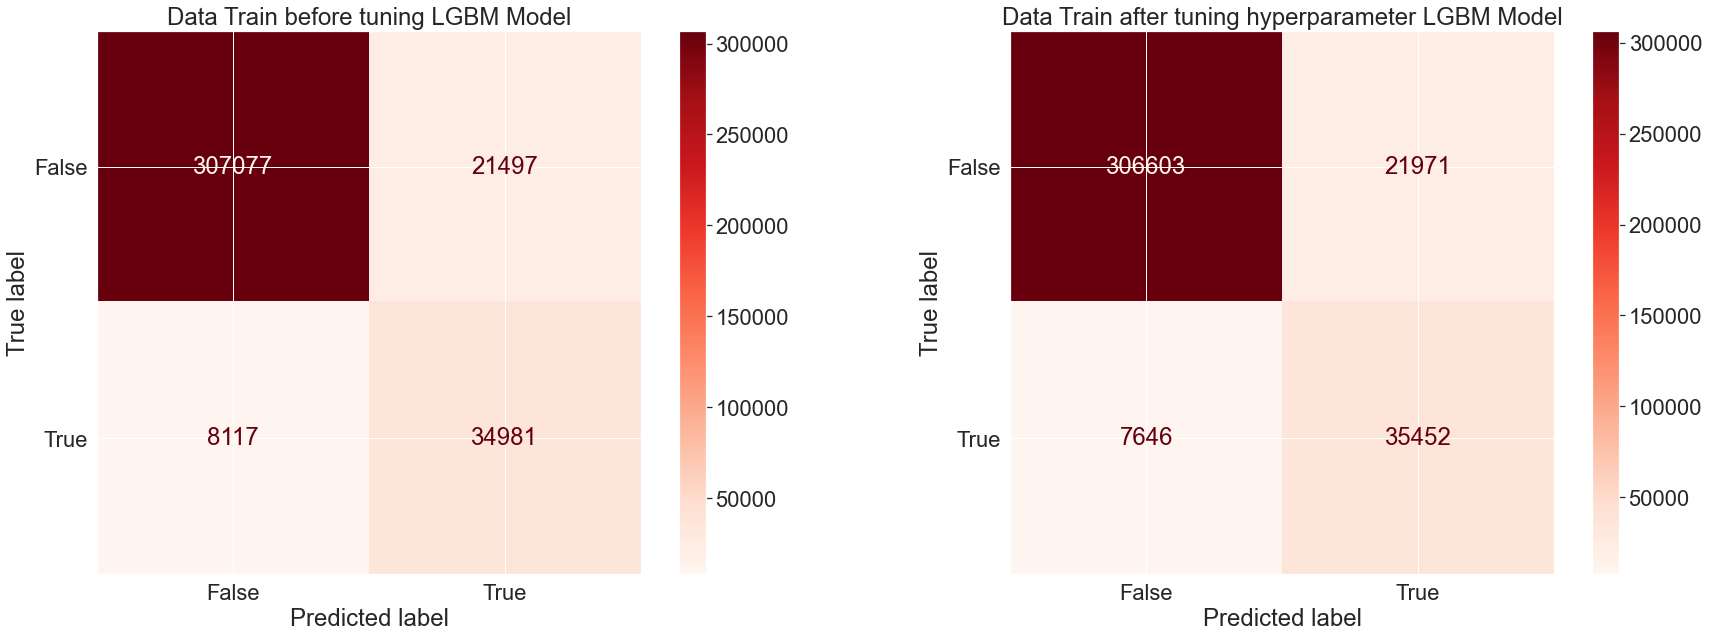

In [91]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train before tuning LGBM Model")
ax[1].set_title("Data Train after tuning hyperparameter LGBM Model")

lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encod, y_train)
y_pred_train_lgbm = lgbm.predict(X_train_encod)

lgbm_rs = LGBMClassifier(n_jobs=-1, class_weight = 'balanced', random_state=42, num_leaves=50, min_gain_to_split=0.001, min_data_in_leaf=10, 
                         max_depth=10, lambda_l2=5, lambda_l1=0, feature_fraction=0.8, boosting_type='gbdt', bagging_fraction=1)
lgbm_rs.fit(X_train_encod, y_train)
y_pred_train_lgbm_rs = lgbm_rs.predict(X_train_encod)

print("Score Before Hyperparameter Tuning Use LGBM")
print(metrics.classification_report(y_train,y_pred_train_lgbm))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Reds')

print("Score After Hyperparameter Tuning Use LGBM")
print(metrics.classification_report(y_train,y_pred_train_lgbm_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm_rs), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

### Model Evaluation

- Model akan dievaluasi menggunakan nilai AUC, Gini dan KS atau Kolmogorov Smirnov

[Credit Risk Modelling in Python](https://medium.com/analytics-vidhya/credit-risk-modelling-in-python-3ab4b00f6505) \
[GINI, CUMULATIVE ACCURACY PROFILE, AUC](https://www.listendata.com/2019/09/gini-cumulative-accuracy-profile-auc.html) \
[Evaluating classification models with Kolmogorov-Smirnov (KS) test](https://towardsdatascience.com/evaluating-classification-models-with-kolmogorov-smirnov-ks-test-e211025f5573) \
[SAS : CALCULATING KS STATISTICS](https://www.listendata.com/2016/01/sas-calculating-ks-test.html)

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [93]:
from scipy.stats import ks_2samp

#Evaluation Before Hypertunning
lgbm.fit(X_train_encoding, y_train)
y_pred_train_lgbm = lgbm.predict(X_train_encoding)
y_train_lgbm_proba = lgbm.predict_proba(X_train_encoding)[:,1]
fpr_, tpr_, thresholds_ = roc_curve(y_train, y_train_lgbm_proba)

roc_auc_value_ = roc_auc_score(y_train, y_train_lgbm_proba).round(4)
gini_value_ = ((2*roc_auc_value_)-1).round(4)
stat_KS_, p_value_ = ks_2samp(y_train, y_train_lgbm_proba)
df_fpr_tpr_before = pd.DataFrame({'FPR':fpr_, 'TPR':tpr_, 'Threshold':thresholds_})


#Evaluation After Hypertunning
lgbm_rs.fit(X_train_encoding, y_train)
y_pred_train_lgbm_rs = lgbm_rs.predict(X_train_encoding)
y_train_lgbm_rs_proba = lgbm_rs.predict_proba(X_train_encoding)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_lgbm_rs_proba)
df_fpr_tpr_after = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
                                                                 
roc_auc_value = roc_auc_score(y_train, y_train_lgbm_rs_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)
stat_KS, p_value = ks_2samp(y_train, y_train_lgbm_rs_proba)                                 
                              

#Table
tabel_perform_model = pd.DataFrame({'Kategori (Data Test)':['Before Hyperparamater Tunning', 'After Hyperparamater Tunning'],
                             'AUC_ROC' : [roc_auc_value_, roc_auc_value],
                             'Gini' : [gini_value_, gini_value],
                            'KS' : [round(stat_KS_,4), round(stat_KS,4)]})

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5


In [94]:
tabel_perform_model

Kategori (Data Test)  AUC_ROC   Gini     KS
0  Before Hyperparamater Tunning   0.9435  0.887  0.884
1   After Hyperparamater Tunning   0.9495  0.899  0.884

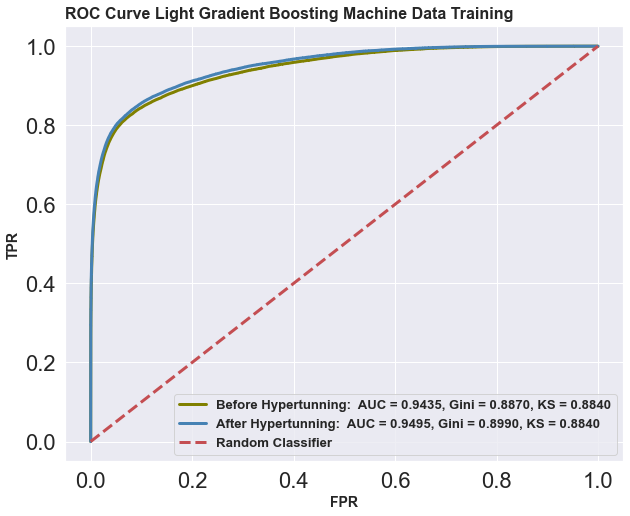

In [95]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.rcParams['figure.figsize'] = (10,7)
sns.set(font_scale=1.2)
plt.plot(fpr_, tpr_, 'Olive', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Before Hypertunning: ', tabel_perform_model['AUC_ROC'][0], tabel_perform_model['Gini'][0], tabel_perform_model['KS'][0]),linewidth=3)
plt.plot(fpr, tpr, 'Steelblue', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('After Hypertunning: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Light Gradient Boosting Machine Data Training",fontsize=16,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Nilai AUC pada model Light GBM setelah dilakukan hypertunning parameter nilainya lebih besar dibandingkan sebelum hypertunning parameter. Meski perbedaannya tidak terlalu signifikan yaitu hanya 0.5%, Gini setelah dilakukan hypertunning parameter nilainya lebih tinggi dibandingkan sebelum hypertunning. Sedangkan untuk performa menggunakan KS tidak ada perbedaan. Oleh karena itu, parameter yang ada pada hypertunning yang akan digunakan untuk proses selanjutnya

## Tuning Threshold

- Akan dilakukan tuning threshold untuk mengetahui threshold optimal pada case ini. Salah satu teknik yang digunakan adalah dengan menggunakan Gmean

[Tuning Treshold for Imbalanced Data](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)

In [96]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits=4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.422 with G-Mean: 0.8781
FPR: 0.0885, TPR: 0.8459


In [97]:
best_th = df_fpr_tpr_after.round(4)
best_th.drop_duplicates(subset=None, keep='first', inplace=True)
best_th = best_th[(best_th['Threshold']==thresholdOpt) & (best_th['FPR']==fprOpt) & (best_th['TPR']==tprOpt)]
best_th

FPR     TPR  Threshold
17248  0.0885  0.8459      0.422

Score LGBM Hyperparameter with default Threshold
              precision    recall  f1-score   support

           0       0.98      0.93      0.95    328574
           1       0.62      0.82      0.71     43098

    accuracy                           0.92    371672
   macro avg       0.80      0.88      0.83    371672
weighted avg       0.93      0.92      0.93    371672

Score LGBM after Tuning Threshold
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    328574
           1       0.56      0.85      0.67     43098

    accuracy                           0.90    371672
   macro avg       0.77      0.88      0.81    371672
weighted avg       0.93      0.90      0.91    371672



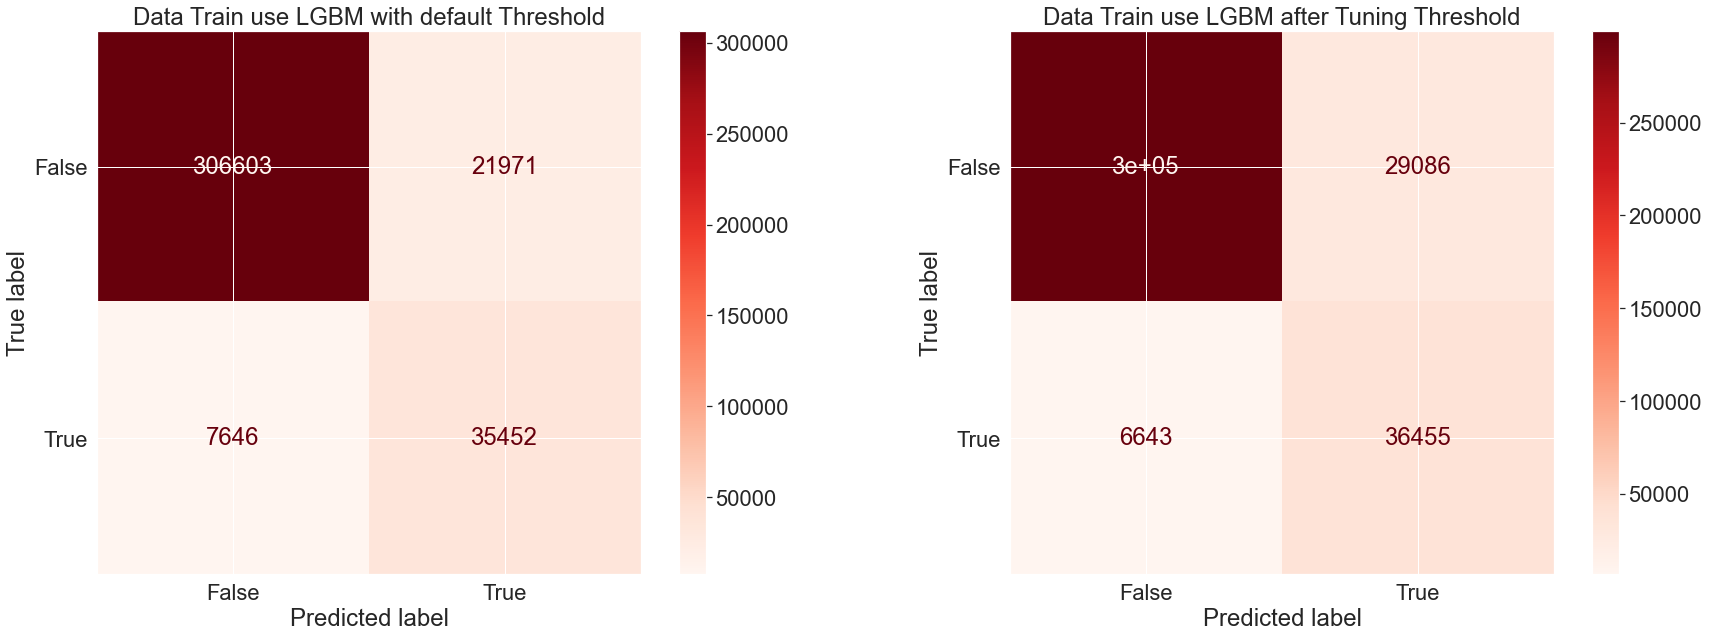

In [98]:
threshold = thresholdOpt 
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train use LGBM with default Threshold")
ax[1].set_title("Data Train use LGBM after Tuning Threshold")

lgbm.fit(X_train_encod, y_train)
y_pred_train_lgbm_rs = lgbm_rs.predict(X_train_encod)
y_pred_train_thr = np.where(lgbm_rs.predict_proba(X_train_encod)[:,1]>=threshold,1,0)

print("Score LGBM Hyperparameter with default Threshold")
print(metrics.classification_report(y_train,y_pred_train_lgbm_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm_rs), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Reds')

print("Score LGBM after Tuning Threshold")
print(metrics.classification_report(y_train,y_pred_train_thr))
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

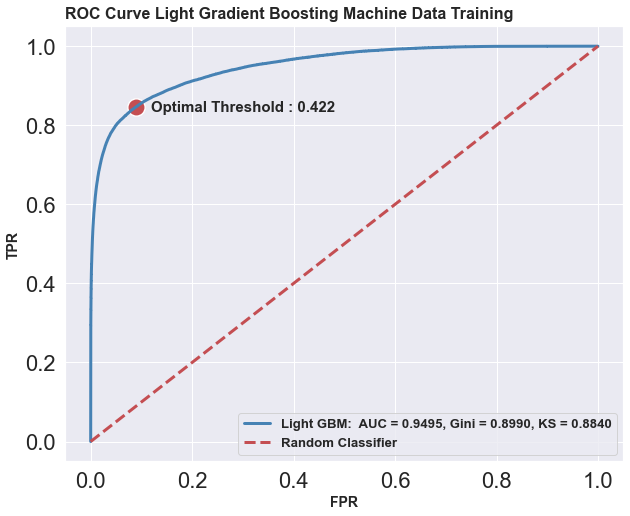

In [99]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.rcParams['figure.figsize'] = (10,7)
sns.set(font_scale=1.2)
sns.scatterplot(x=best_th['FPR'],y=best_th['TPR'],s=300,color='r',alpha=1)
plt.plot(fpr, tpr, 'Steelblue', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Light GBM: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Light Gradient Boosting Machine Data Training",fontsize=16,weight='bold')
plt.text(x=best_th['FPR']+0.03,y=best_th['TPR']-0.01,s=f'Optimal Threshold : {thresholdOpt}',fontsize=15,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Threshold optimal yang diperoleh adalah 0.422, sehingga ketika nasabah yang memiliki peluang > 0.422 maka diprediksi nasabah tersebut mengalami kesulitan pembayaran.

## Implementasi Model in Data Test

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
Score LGBM after Tuning Threshold
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     82144
           1       0.55      0.83      0.66     10774

    accuracy                           0.90     92918
   macro avg       0.76      0.87      0.80     92918
weighted

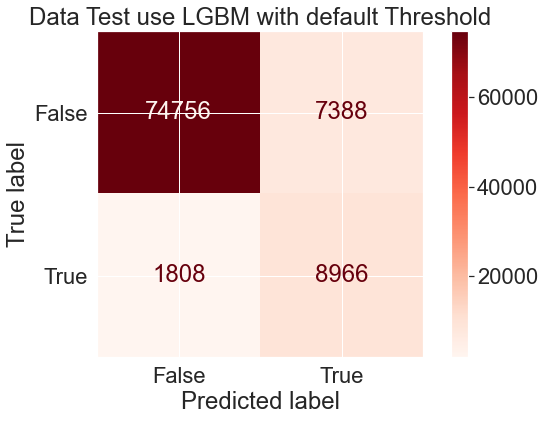

In [101]:
threshold = thresholdOpt 
plt.rcParams['figure.figsize'] = (10,6)
sns.set(font_scale=2)

lgbm_rs.fit(X_train_encod, y_train)
y_pred_test_lgbm_rs = lgbm_rs.predict(X_test_encod)
y_pred_test_thr_test = np.where(lgbm_rs.predict_proba(X_test_encod)[:,1]>=threshold,1,0)
y_pred_test_proba_test = lgbm_rs.predict_proba(X_test_encod)[:,1]

print("Score LGBM after Tuning Threshold")
print(metrics.classification_report(y_test,y_pred_test_thr_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr_test)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr_test), 
display_labels = [False, True]).plot(cmap='Reds')
plt.title("Data Test use LGBM with default Threshold");

- Setelah diimplementasikan ke Data Test dari total 92.918 customer, 16.354 diantaranya diprediksi mengalami kesulitan pembayaran.
- Nilai AUC pada Data Test 0.940, dan nilai Gini serta KS masih di atas 0.8. Performa model masih cukup baik dalam melakukan prediksi pada Data Test.

In [102]:
#perform roc_auc dan gini
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, lgbm_rs.predict_proba(X_test_encod)[:,1])
df_fpr_tpr_test = pd.DataFrame({'FPR':fpr_test, 'TPR':tpr_test, 'Threshold':thresholds_test})
roc_auc_value_test = roc_auc_score(y_test, lgbm_rs.predict_proba(X_test_encod)[:,1]).round(4)
gini_value_test = ((2*roc_auc_value_test)-1).round(4)


from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
y_test_lgbm_rs_proba = lgbm_rs.predict_proba(X_test_encoding)[:,1]

stat_KS, p_value = ks_2samp(y_test, y_test_lgbm_rs_proba)


print(f'AUC Evaluation : {roc_auc_value_test}')
print(f'Gini Evaluation : {gini_value_test}')
print(f'KS Evaluation : {stat_KS}')

AUC Evaluation : 0.9402
Gini Evaluation : 0.8804
KS Evaluation : 0.884048300652188


In [103]:
best_th = df_fpr_tpr_test.round(4)
best_th.drop_duplicates(subset=None, keep='first', inplace=True)
best_th = best_th[best_th['Threshold']==0.422]
best_th

FPR     TPR  Threshold
4211  0.09  0.8322      0.422

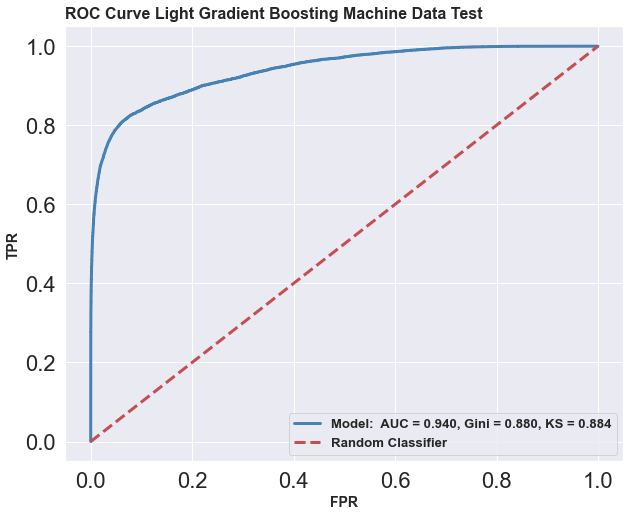

In [104]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.rcParams['figure.figsize'] = (10,7)
sns.set(font_scale=1.2)
plt.plot(fpr_test, tpr_test, 'Steelblue', label='%s AUC = %0.3f, Gini = %0.3f, KS = %0.3f' % ('Model: ', roc_auc_value_test, gini_value_test, stat_KS),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Light Gradient Boosting Machine Data Test",fontsize=16,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Dari hasil model Light GBM yang diimplementasikan pada data test nilai AUC_ROC = 0.940 dimana kinerja algoritma Light GBM untuk kasus dataset ini dapat memprediksi data test dengan baik dan Gini di atas 0.8. 
- Selain itu, nilai statistik dari KS di atas 0.8 dimana semakin tinggi nilai statistik dari KS semakin baik model membedakan antara calon customer yang kesulitan bayar dan lancar dalam pembayaran

## Feature Importance

In [105]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_test_encoding.columns)
    sns.set(font_scale=1.2)
    ax = feat_importances.nlargest(50).plot(kind='barh', figsize=(8, 10), color = 'Steelblue')
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5


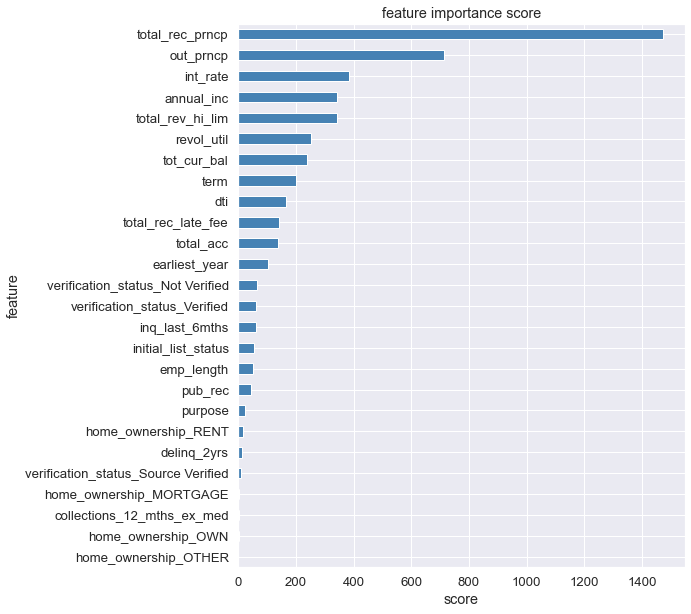

In [106]:
lgbm_rs.fit(X_train_encod, y_train)
show_feature_importance(lgbm_rs)

## Shap Value

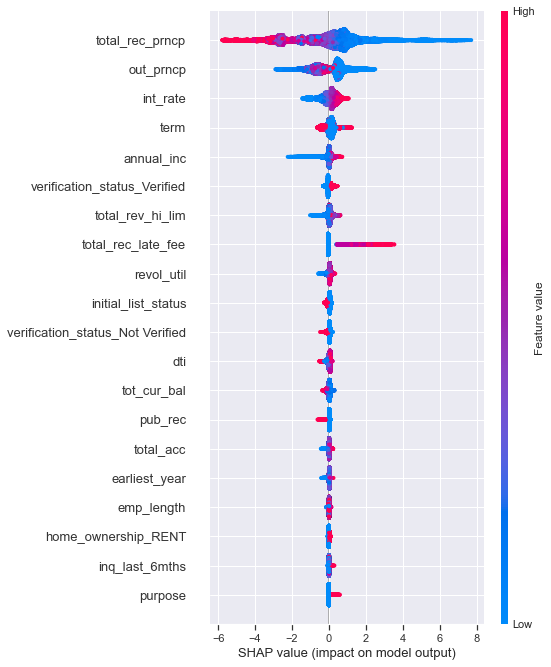

In [107]:
import shap
explainer = shap.TreeExplainer(lgbm_rs)
shap_values = explainer.shap_values(X_test_encoding)
shap.summary_plot(shap_values[1], X_test_encoding) # Summary shap value terhadap label positive

- Semakin tinggi Total Principal atau pokok hutang yang telah dibayarkan customer, maka semakin besar peluang customer mengalami kesulitan pembayaran
- Semakin tinggi Outstanding Principal atau sisa pokok hutang customer, maka peluang customer mengalami kesulitan pembayaran
- Semakin tinggi Interet Rate atau bunga pinjaman, maka semakin besar peluang customer mengalami kesulitan pembayaran